In [2]:
import json
from collections import Counter, defaultdict
import os

# Define file paths
ANNOTATION_DIR = r"C:\Users\SouayedBelkiss\OneDrive - gae\Desktop\Thesis\annotation_analysis\expert work"
MAPPING_DIR = r"C:\Users\SouayedBelkiss\OneDrive - gae\Desktop\Thesis\annotation_analysis\required files"

# Expert annotation files
ANNOTATION_FILES = {
    'Expert_A': 'alexa_annotations.json',
    'Expert_K': 'katrin_annotations.json', 
    'Expert_L': 'luisa_annotations.json',
    'Expert_M': 'martin_annotations.json'
}

def load_json_file(filepath):
    """Load JSON annotation file"""
    try:
        with open(filepath, 'r', encoding='utf-8') as f:
            return json.load(f)
    except Exception as e:
        print(f"Error loading {filepath}: {e}")
        return None

def extract_style_annotations(data, expert_name):
    """Extract style annotations from expert data"""
    style_data = []
    
    for record in data:
        # Get image filename
        image_filename = record['data'].get('original_filename', 'Unknown')
        
        # Get annotations
        if record['annotations']:
            annotation = record['annotations'][0]  # First annotation
            
            # Look for style annotations in the result
            for item in annotation['result']:
                if item['from_name'] == 'image_style' and item['type'] == 'choices':
                    styles_selected = item['value']['choices']
                    
                    style_data.append({
                        'expert': expert_name,
                        'image': image_filename,
                        'styles_selected': styles_selected,
                        'num_styles': len(styles_selected)
                    })
                    break
    
    return style_data

def analyze_all_experts():
    """Analyze style annotations for all experts"""
    all_style_data = []
    expert_summaries = {}
    
    print("="*80)
    print("STYLE ANNOTATION ANALYSIS")
    print("="*80)
    
    for expert_name, filename in ANNOTATION_FILES.items():
        filepath = os.path.join(ANNOTATION_DIR, filename)
        print(f"\n📊 Analyzing {expert_name} ({filename})")
        
        # Load data
        data = load_json_file(filepath)
        if data is None:
            continue
            
        # Extract style annotations
        style_data = extract_style_annotations(data, expert_name)
        all_style_data.extend(style_data)
        
        if style_data:
            # Count styles selected by this expert
            all_styles = []
            for entry in style_data:
                all_styles.extend(entry['styles_selected'])
            
            style_counts = Counter(all_styles)
            num_selections = [entry['num_styles'] for entry in style_data]
            
            print(f"   • Total images annotated: {len(style_data)}")
            print(f"   • Styles per image: Min={min(num_selections)}, Max={max(num_selections)}, Avg={sum(num_selections)/len(num_selections):.1f}")
            print(f"   • Total style selections made: {len(all_styles)}")
            print(f"   • Unique styles used: {len(style_counts)}")
            
            # Store summary
            expert_summaries[expert_name] = {
                'images_annotated': len(style_data),
                'total_selections': len(all_styles),
                'unique_styles': len(style_counts),
                'style_counts': style_counts,
                'selections_per_image': num_selections
            }
            
            # Show top styles for this expert
            print(f"   • Top 5 styles selected:")
            for style, count in style_counts.most_common(5):
                print(f"     - {style}: {count} times")
        else:
            print(f"   ⚠️  No style annotations found!")
    
    return all_style_data, expert_summaries

def show_detailed_style_analysis(all_style_data, expert_summaries):
    """Show detailed analysis of style selections"""
    print("\n" + "="*80)
    print("DETAILED STYLE ANALYSIS")
    print("="*80)
    
    # Overall statistics
    all_styles_selected = []
    for entry in all_style_data:
        all_styles_selected.extend(entry['styles_selected'])
    
    overall_style_counts = Counter(all_styles_selected)
    
    print(f"\n🎨 OVERALL STYLE STATISTICS:")
    print(f"   • Total style selections across all experts: {len(all_styles_selected)}")
    print(f"   • Unique styles used: {len(overall_style_counts)}")
    print(f"   • Most popular styles:")
    for style, count in overall_style_counts.most_common(10):
        print(f"     - {style}: {count} selections")
    
    print(f"\n📈 EXPERT COMPARISON:")
    print(f"{'Expert':<12} {'Images':<8} {'Total_Sel':<10} {'Unique':<8} {'Avg/Image':<10}")
    print("-" * 60)
    for expert, summary in expert_summaries.items():
        avg_per_image = summary['total_selections'] / summary['images_annotated']
        print(f"{expert:<12} {summary['images_annotated']:<8} {summary['total_selections']:<10} {summary['unique_styles']:<8} {avg_per_image:<10.1f}")
    
    
    # Check for style name variations
    print(f"\n🔍 ALL UNIQUE STYLE NAMES FOUND:")
    unique_styles = sorted(overall_style_counts.keys())
    for i, style in enumerate(unique_styles, 1):
        print(f"   {i:2d}. '{style}' ({overall_style_counts[style]} selections)")
    
    return overall_style_counts, unique_styles

def check_style_consistency():
    """Check how styles are written and if there are variations"""
    print("\n" + "="*80)
    print("STYLE NAME CONSISTENCY CHECK")
    print("="*80)
    
    # Known ground truth styles
    ground_truth_styles = ['3d rendered', 'artistic', 'cartoon', 'digital art', 'geometric', 
                          'minimalistic', 'realistic', 'retro', 'storybook', 'technical']
    
    print("Ground truth styles:")
    for i, style in enumerate(ground_truth_styles, 1):
        print(f"   {i:2d}. '{style}'")
    
    return ground_truth_styles

# Run the analysis
if __name__ == "__main__":
    # Extract and analyze style annotations
    all_style_data, expert_summaries = analyze_all_experts()
    
    if all_style_data:
        # Show detailed analysis
        overall_counts, unique_styles = show_detailed_style_analysis(all_style_data, expert_summaries)
        
        # Check consistency
        ground_truth_styles = check_style_consistency()
        
        print(f"\n" + "="*80)
        print("NEXT STEPS FOR RECALL@3 ANALYSIS")
        print("="*80)
        print("✅ Style annotation format identified")
        print("✅ Expert selection patterns analyzed") 
        print("📋 Ready to proceed with:")
        print("   • Recall@3 calculation")
        print("   • Ground truth mapping")
        print("   • Per-expert and per-style performance analysis")
    else:
        print("❌ No style annotations found. Please check file paths and JSON structure.")

STYLE ANNOTATION ANALYSIS

📊 Analyzing Expert_A (alexa_annotations.json)
   • Total images annotated: 250
   • Styles per image: Min=1, Max=3, Avg=2.2
   • Total style selections made: 558
   • Unique styles used: 10
   • Top 5 styles selected:
     - Retro: 125 times
     - Storybook: 90 times
     - Cartoon: 85 times
     - Geometric: 52 times
     - 3D Rendered: 45 times

📊 Analyzing Expert_K (katrin_annotations.json)
   • Total images annotated: 250
   • Styles per image: Min=1, Max=3, Avg=2.8
   • Total style selections made: 689
   • Unique styles used: 10
   • Top 5 styles selected:
     - Retro: 171 times
     - Minimalistic: 128 times
     - Artistic: 92 times
     - Cartoon: 90 times
     - Storybook: 75 times

📊 Analyzing Expert_L (luisa_annotations.json)
   • Total images annotated: 200
   • Styles per image: Min=1, Max=4, Avg=2.1
   • Total style selections made: 421
   • Unique styles used: 10
   • Top 5 styles selected:
     - 3D Rendered: 112 times
     - Cartoon: 105 t

In [4]:
import json
import csv
from collections import Counter, defaultdict
import os

# Define file paths
ANNOTATION_DIR = r"C:\Users\SouayedBelkiss\OneDrive - gae\Desktop\Thesis\annotation_analysis\expert work"
MAPPING_DIR = r"C:\Users\SouayedBelkiss\OneDrive - gae\Desktop\Thesis\annotation_analysis\required files"

# Expert annotation files
ANNOTATION_FILES = {
    'Expert_A': 'alexa_annotations.json',
    'Expert_K': 'katrin_annotations.json', 
    'Expert_L': 'luisa_annotations.json',
    'Expert_M': 'martin_annotations.json'
}

# Ground truth styles (normalized)
GROUND_TRUTH_STYLES = ['3d rendered', 'artistic', 'cartoon', 'digital art', 'geometric', 
                      'minimalistic', 'realistic', 'retro', 'storybook', 'technical']

def normalize_style_name(style_name):
    """Normalize style names for consistent matching"""
    return style_name.lower().strip()

def load_ground_truth_mapping():
    """Load the mapping file to get ground truth styles for each image"""
    mapping_file = os.path.join(MAPPING_DIR, 'renamed_images_mapping.csv')
    
    ground_truth = {}
    try:
        with open(mapping_file, 'r', encoding='utf-8') as f:
            reader = csv.DictReader(f)
            for row in reader:
                filename = row['new_filename']
                style = normalize_style_name(row['style'])
                ground_truth[filename] = style
        print(f"✅ Loaded ground truth for {len(ground_truth)} images")
        return ground_truth
    except Exception as e:
        print(f"❌ Error loading ground truth mapping: {e}")
        return {}

def load_expert_annotations():
    """Load all expert annotations with style selections"""
    all_annotations = {}
    
    for expert_name, filename in ANNOTATION_FILES.items():
        filepath = os.path.join(ANNOTATION_DIR, filename)
        
        try:
            with open(filepath, 'r', encoding='utf-8') as f:
                data = json.load(f)
            
            expert_annotations = {}
            
            for record in data:
                # Get image filename and extract numerical part
                image_filename = record['data'].get('original_filename', '')
                
                # Extract just the numerical part (e.g., "0008_IAA.png" -> "0008.png")
                if image_filename:
                    # Remove _IAA suffix if present, then ensure .png extension
                    base_name = image_filename.replace('_IAA', '').replace('.png', '') + '.png'
                    image_key = base_name
                else:
                    continue
                
                # Extract style selections
                if record['annotations']:
                    annotation = record['annotations'][0]
                    
                    for item in annotation['result']:
                        if item['from_name'] == 'image_style' and item['type'] == 'choices':
                            styles_selected = item['value']['choices']
                            
                            # Normalize style names and limit to top 3 if more than 3 selected
                            normalized_styles = [normalize_style_name(style) for style in styles_selected]
                            top_3_styles = normalized_styles[:3]  # Take first 3 if more than 3
                            
                            expert_annotations[image_key] = {
                                'styles_selected': top_3_styles,
                                'num_selected': len(normalized_styles),
                                'original_selection': styles_selected
                            }
                            break
            
            all_annotations[expert_name] = expert_annotations
            print(f"✅ Loaded {len(expert_annotations)} annotations for {expert_name}")
            
        except Exception as e:
            print(f"❌ Error loading {expert_name}: {e}")
    
    return all_annotations

def calculate_recall_at_3(ground_truth, expert_annotations):
    """
    Calculate Recall@3 for style recognition.
    
    Recall@3 means: if the correct ground truth style appears anywhere 
    in the expert's top 3 selected styles, it counts as correct.
    This measures how well experts can identify the correct style 
    when allowed to pick up to 3 style choices.
    """
    results = {
        'overall': {'correct': 0, 'total': 0, 'recall': 0.0},
        'per_expert': {},
        'per_style': defaultdict(lambda: {'correct': 0, 'total': 0, 'recall': 0.0}),
        'expert_style_matrix': {},
        'style_frequency': Counter(),
        'selection_patterns': {}
    }
    
    # Track selection patterns
    for expert_name in expert_annotations:
        results['selection_patterns'][expert_name] = {
            'selected_1': 0, 'selected_2': 0, 'selected_3': 0, 'selected_4+': 0
        }
    
    print("\n" + "="*80)
    print("RECALL@3 CALCULATION")
    print("="*80)
    
    # Calculate per-expert recall
    for expert_name, annotations in expert_annotations.items():
        expert_correct = 0
        expert_total = 0
        expert_style_performance = defaultdict(lambda: {'correct': 0, 'total': 0})
        expert_style_selections = Counter()
        
        for image_filename, annotation in annotations.items():
            if image_filename in ground_truth:
                true_style = ground_truth[image_filename]
                selected_styles = annotation['styles_selected']
                num_selected = annotation['num_selected']
                
                # Track selection patterns
                if num_selected == 1:
                    results['selection_patterns'][expert_name]['selected_1'] += 1
                elif num_selected == 2:
                    results['selection_patterns'][expert_name]['selected_2'] += 1
                elif num_selected == 3:
                    results['selection_patterns'][expert_name]['selected_3'] += 1
                else:
                    results['selection_patterns'][expert_name]['selected_4+'] += 1
                
                # Count style selections
                for style in selected_styles:
                    expert_style_selections[style] += 1
                    results['style_frequency'][style] += 1
                
                expert_total += 1
                results['per_style'][true_style]['total'] += 1
                
                # Check if ground truth style is in top 3 selections (Recall@3)
                # This counts as correct if the true style appears anywhere in the 3 choices
                if true_style in selected_styles:
                    expert_correct += 1
                    results['per_style'][true_style]['correct'] += 1
                    expert_style_performance[true_style]['correct'] += 1
                
                expert_style_performance[true_style]['total'] += 1
        
        # Calculate expert recall
        expert_recall = expert_correct / expert_total if expert_total > 0 else 0
        results['per_expert'][expert_name] = {
            'correct': expert_correct,
            'total': expert_total,
            'recall': expert_recall,
            'style_selections': expert_style_selections
        }
        
        # Store expert-style matrix
        results['expert_style_matrix'][expert_name] = expert_style_performance
        
        # Add to overall totals
        results['overall']['correct'] += expert_correct
        results['overall']['total'] += expert_total
        
        print(f"📊 {expert_name}: {expert_correct}/{expert_total} = {expert_recall:.3f} ({expert_recall*100:.1f}%)")
    
    # Calculate overall recall
    results['overall']['recall'] = results['overall']['correct'] / results['overall']['total'] if results['overall']['total'] > 0 else 0
    
    # Calculate per-style recall
    for style in results['per_style']:
        style_data = results['per_style'][style]
        style_data['recall'] = style_data['correct'] / style_data['total'] if style_data['total'] > 0 else 0
    
    return results

def display_comprehensive_results(results):
    """Display comprehensive analysis results"""
    
    print(f"\n🎯 OVERALL RECALL@3: {results['overall']['recall']:.3f} ({results['overall']['recall']*100:.1f}%)")
    print(f"   Total correct: {results['overall']['correct']}/{results['overall']['total']}")
    
    # Expert comparison
    print(f"\n📈 EXPERT PERFORMANCE COMPARISON:")
    print(f"{'Expert':<12} {'Correct':<8} {'Total':<8} {'Recall@3':<10} {'%':<8}")
    print("-" * 50)
    for expert, data in results['per_expert'].items():
        print(f"{expert:<12} {data['correct']:<8} {data['total']:<8} {data['recall']:<10.3f} {data['recall']*100:<8.1f}%")
    
    # Per-style difficulty analysis
    print(f"\n🎨 PER-STYLE DIFFICULTY ANALYSIS:")
    print(f"{'Style':<15} {'Correct':<8} {'Total':<8} {'Recall@3':<10} {'%':<8} {'Difficulty':<12}")
    print("-" * 70)
    
    # Sort styles by recall (hardest first)
    sorted_styles = sorted(results['per_style'].items(), key=lambda x: x[1]['recall'])
    
    for style, data in sorted_styles:
        if data['total'] > 0:
            difficulty = "Very Hard" if data['recall'] < 0.3 else "Hard" if data['recall'] < 0.6 else "Medium" if data['recall'] < 0.8 else "Easy"
            print(f"{style:<15} {data['correct']:<8} {data['total']:<8} {data['recall']:<10.3f} {data['recall']*100:<8.1f}% {difficulty:<12}")
    
    # Style selection frequency
    print(f"\n📊 STYLE SELECTION FREQUENCY (How often each style was chosen):")
    print(f"{'Style':<15} {'Times Selected':<15} {'% of Total':<12}")
    print("-" * 45)
    
    total_selections = sum(results['style_frequency'].values())
    for style, count in results['style_frequency'].most_common():
        percentage = (count / total_selections) * 100
        print(f"{style:<15} {count:<15} {percentage:<12.1f}%")
    
    # Selection patterns
    print(f"\n🔢 EXPERT SELECTION PATTERNS:")
    print(f"{'Expert':<12} {'1 Style':<8} {'2 Styles':<9} {'3 Styles':<9} {'4+ Styles':<10}")
    print("-" * 55)
    
    for expert, patterns in results['selection_patterns'].items():
        print(f"{expert:<12} {patterns['selected_1']:<8} {patterns['selected_2']:<9} {patterns['selected_3']:<9} {patterns['selected_4+']:<10}")

def create_expert_style_distribution_table(results):
    """Create detailed expert-style distribution table"""
    print(f"\n" + "="*100)
    print("EXPERT STYLE DISTRIBUTION TABLE")
    print("="*100)
    
    # Header
    print(f"{'Style':<15} ", end="")
    for expert in results['per_expert'].keys():
        print(f"{expert:<12} ", end="")
    print("Total")
    print("-" * 80)
    
    # For each style, show how many times each expert selected it
    for style in GROUND_TRUTH_STYLES:
        print(f"{style:<15} ", end="")
        total_for_style = 0
        
        for expert in results['per_expert'].keys():
            count = results['per_expert'][expert]['style_selections'].get(style, 0)
            print(f"{count:<12} ", end="")
            total_for_style += count
        
        print(f"{total_for_style}")
    
    # Totals row
    print("-" * 80)
    print(f"{'TOTAL':<15} ", end="")
    for expert, data in results['per_expert'].items():
        total_selections = sum(data['style_selections'].values())
        print(f"{total_selections:<12} ", end="")
    
    grand_total = sum(results['style_frequency'].values())
    print(f"{grand_total}")

def main():
    """Main analysis function"""
    print("🚀 Starting Style Recognition Analysis (Recall@3)")
    print("="*80)
    
    # Load ground truth mapping
    ground_truth = load_ground_truth_mapping()
    if not ground_truth:
        print("❌ Cannot proceed without ground truth mapping")
        return
    
    # Load expert annotations
    expert_annotations = load_expert_annotations()
    if not expert_annotations:
        print("❌ Cannot proceed without expert annotations")
        return
    
    # Calculate Recall@3
    results = calculate_recall_at_3(ground_truth, expert_annotations)
    
    # Display results
    display_comprehensive_results(results)
    
    # Create distribution table
    create_expert_style_distribution_table(results)
    
    print(f"\n✅ Style Recognition Analysis Complete!")
    print(f"📋 Key Findings:")
    print(f"   • Overall Recall@3: {results['overall']['recall']*100:.1f}%")
    
    best_expert = max(results['per_expert'].items(), key=lambda x: x[1]['recall'])
    worst_expert = min(results['per_expert'].items(), key=lambda x: x[1]['recall'])
    
    print(f"   • Best Expert: {best_expert[0]} ({best_expert[1]['recall']*100:.1f}%)")
    print(f"   • Most Challenging Expert: {worst_expert[0]} ({worst_expert[1]['recall']*100:.1f}%)")
    
    if results['per_style']:
        easiest_style = max(results['per_style'].items(), key=lambda x: x[1]['recall'] if x[1]['total'] > 0 else 0)
        hardest_style = min(results['per_style'].items(), key=lambda x: x[1]['recall'] if x[1]['total'] > 0 else 1)
        
        print(f"   • Easiest Style: {easiest_style[0]} ({easiest_style[1]['recall']*100:.1f}%)")
        print(f"   • Hardest Style: {hardest_style[0]} ({hardest_style[1]['recall']*100:.1f}%)")

if __name__ == "__main__":
    main()

🚀 Starting Style Recognition Analysis (Recall@3)
✅ Loaded ground truth for 2000 images
✅ Loaded 250 annotations for Expert_A
✅ Loaded 250 annotations for Expert_K
✅ Loaded 200 annotations for Expert_L
✅ Loaded 276 annotations for Expert_M

RECALL@3 CALCULATION
📊 Expert_A: 126/250 = 0.504 (50.4%)
📊 Expert_K: 120/250 = 0.480 (48.0%)
📊 Expert_L: 77/200 = 0.385 (38.5%)
📊 Expert_M: 139/276 = 0.504 (50.4%)

🎯 OVERALL RECALL@3: 0.473 (47.3%)
   Total correct: 462/976

📈 EXPERT PERFORMANCE COMPARISON:
Expert       Correct  Total    Recall@3   %       
--------------------------------------------------
Expert_A     126      250      0.504      50.4    %
Expert_K     120      250      0.480      48.0    %
Expert_L     77       200      0.385      38.5    %
Expert_M     139      276      0.504      50.4    %

🎨 PER-STYLE DIFFICULTY ANALYSIS:
Style           Correct  Total    Recall@3   %        Difficulty  
----------------------------------------------------------------------
technical       10 

In [9]:
import json
from collections import Counter, defaultdict
import os

# Define file paths
ANNOTATION_DIR = r"C:\Users\SouayedBelkiss\OneDrive - gae\Desktop\Thesis\annotation_analysis\expert work"
MAPPING_DIR = r"C:\Users\SouayedBelkiss\OneDrive - gae\Desktop\Thesis\annotation_analysis\required files"

# Expert annotation files
ANNOTATION_FILES = {
    'Expert_A': 'alexa_annotations.json',
    'Expert_K': 'katrin_annotations.json', 
    'Expert_L': 'luisa_annotations.json',
    'Expert_M': 'martin_annotations.json'
}

def load_json_file(filepath):
    """Load JSON annotation file"""
    try:
        with open(filepath, 'r', encoding='utf-8') as f:
            return json.load(f)
    except Exception as e:
        print(f"Error loading {filepath}: {e}")
        return None

def extract_style_annotations_with_examples(data, expert_name):
    """Extract style annotations from expert data with detailed examples"""
    style_data = []
    examples_by_count = defaultdict(list)  # To store examples by number of styles selected
    
    for record in data:
        # Get image filename
        image_filename = record['data'].get('original_filename', 'Unknown')
        
        # Get annotations
        if record['annotations']:
            annotation = record['annotations'][0]  # First annotation
            
            # Look for style annotations in the result
            for item in annotation['result']:
                if item['from_name'] == 'image_style' and item['type'] == 'choices':
                    styles_selected = item['value']['choices']
                    num_styles = len(styles_selected)
                    
                    entry = {
                        'expert': expert_name,
                        'image': image_filename,
                        'styles_selected': styles_selected,
                        'num_styles': num_styles
                    }
                    
                    style_data.append(entry)
                    
                    # Store examples by count for verification
                    examples_by_count[num_styles].append({
                        'image': image_filename,
                        'styles': styles_selected
                    })
                    break
    
    return style_data, examples_by_count

def analyze_all_experts_enhanced():
    """Enhanced analysis with examples and detailed statistics"""
    all_style_data = []
    expert_summaries = {}
    
    print("="*100)
    print("ENHANCED STYLE ANNOTATION ANALYSIS - VERIFICATION OF 3-STYLE REQUIREMENT")
    print("="*100)
    
    for expert_name, filename in ANNOTATION_FILES.items():
        filepath = os.path.join(ANNOTATION_DIR, filename)
        print(f"\n📊 Analyzing {expert_name} ({filename})")
        print("-" * 80)
        
        # Load data
        data = load_json_file(filepath)
        if data is None:
            continue
            
        # Extract style annotations with examples
        style_data, examples_by_count = extract_style_annotations_with_examples(data, expert_name)
        all_style_data.extend(style_data)
        
        if style_data:
            # Count styles selected by this expert
            all_styles = []
            for entry in style_data:
                all_styles.extend(entry['styles_selected'])
            
            style_counts = Counter(all_styles)
            num_selections = [entry['num_styles'] for entry in style_data]
            selection_distribution = Counter(num_selections)
            
            print(f"   📈 BASIC STATISTICS:")
            print(f"      • Total images annotated: {len(style_data)}")
            print(f"      • Total style selections made: {len(all_styles)}")
            print(f"      • Average styles per image: {sum(num_selections)/len(num_selections):.2f}")
            print(f"      • Most frequent style: '{style_counts.most_common(1)[0][0]}' ({style_counts.most_common(1)[0][1]} times)")
            
            print(f"\n   🎯 SELECTION PATTERN ANALYSIS:")
            print(f"      • Distribution of styles per image:")
            for num_styles in sorted(selection_distribution.keys()):
                count = selection_distribution[num_styles]
                percentage = (count / len(style_data)) * 100
                print(f"        - {num_styles} style(s): {count} images ({percentage:.1f}%)")
            
            # Show examples for concerning patterns (not 3 styles)
            print(f"\n   🔍 EXAMPLES OF NON-3-STYLE SELECTIONS:")
            for num_styles in sorted(examples_by_count.keys()):
                if num_styles != 3:  # Focus on non-3 selections
                    examples = examples_by_count[num_styles][:3]  # Show up to 3 examples
                    print(f"      📋 {num_styles} style(s) selected ({len(examples_by_count[num_styles])} total cases):")
                    for i, example in enumerate(examples, 1):
                        styles_str = "', '".join(example['styles'])
                        print(f"         {i}. Image: {example['image']}")
                        print(f"            Styles: ['{styles_str}']")
                    if len(examples_by_count[num_styles]) > 3:
                        print(f"         ... and {len(examples_by_count[num_styles]) - 3} more cases")
            
            # Store summary for table
            expert_summaries[expert_name] = {
                'images_annotated': len(style_data),
                'total_selections': len(all_styles),
                'avg_per_image': sum(num_selections)/len(num_selections),
                'most_frequent_style': style_counts.most_common(1)[0][0],
                'most_frequent_count': style_counts.most_common(1)[0][1],
                'selection_distribution': selection_distribution,
                'exactly_3_styles': selection_distribution.get(3, 0),
                'not_3_styles': len(style_data) - selection_distribution.get(3, 0)
            }
            
        else:
            print(f"   ⚠️  No style annotations found!")
    
    return all_style_data, expert_summaries

def create_expert_summary_table(expert_summaries):
    """Create a comprehensive summary table"""
    print("\n" + "="*120)
    print("EXPERT SUMMARY TABLE - STYLE SELECTION PATTERNS")
    print("="*120)
    
    # Header
    header = f"{'Expert':<10} {'Images':<8} {'Avg/Img':<8} {'Most Picked Style':<20} {'Count':<6} {'3-Styles':<9} {'Not-3':<6} {'Compliance':<10}"
    print(header)
    print("-" * 120)
    
    total_images = 0
    total_3_styles = 0
    
    for expert_name, summary in expert_summaries.items():
        compliance_rate = (summary['exactly_3_styles'] / summary['images_annotated']) * 100
        
        print(f"{expert_name:<10} "
              f"{summary['images_annotated']:<8} "
              f"{summary['avg_per_image']:<8.2f} "
              f"{summary['most_frequent_style']:<20} "
              f"{summary['most_frequent_count']:<6} "
              f"{summary['exactly_3_styles']:<9} "
              f"{summary['not_3_styles']:<6} "
              f"{compliance_rate:<10.1f}%")
        
        total_images += summary['images_annotated']
        total_3_styles += summary['exactly_3_styles']
    
    print("-" * 120)
    overall_compliance = (total_3_styles / total_images) * 100 if total_images > 0 else 0
    print(f"{'OVERALL':<10} "
          f"{total_images:<8} "
          f"{'N/A':<8} "
          f"{'N/A':<20} "
          f"{'N/A':<6} "
          f"{total_3_styles:<9} "
          f"{total_images - total_3_styles:<6} "
          f"{overall_compliance:<10.1f}%")

def show_detailed_selection_patterns(expert_summaries):
    """Show detailed breakdown of selection patterns per expert"""
    print("\n" + "="*100)
    print("DETAILED SELECTION PATTERN BREAKDOWN")
    print("="*100)
    
    for expert_name, summary in expert_summaries.items():
        print(f"\n🔍 {expert_name} - Selection Distribution:")
        distribution = summary['selection_distribution']
        total_images = summary['images_annotated']
        
        for num_styles in sorted(distribution.keys()):
            count = distribution[num_styles]
            percentage = (count / total_images) * 100
            status = "✅ EXPECTED" if num_styles == 3 else "⚠️  UNEXPECTED"
            print(f"   {num_styles} style(s): {count:3d} images ({percentage:5.1f}%) {status}")

def analyze_style_compliance_issues(all_style_data):
    """Analyze patterns in non-compliance cases"""
    print("\n" + "="*100)
    print("COMPLIANCE ISSUE ANALYSIS")
    print("="*100)
    
    non_compliant = [entry for entry in all_style_data if entry['num_styles'] != 3]
    compliant = [entry for entry in all_style_data if entry['num_styles'] == 3]
    
    print(f"📊 COMPLIANCE OVERVIEW:")
    print(f"   • Total annotations: {len(all_style_data)}")
    print(f"   • Compliant (3 styles): {len(compliant)} ({len(compliant)/len(all_style_data)*100:.1f}%)")
    print(f"   • Non-compliant: {len(non_compliant)} ({len(non_compliant)/len(all_style_data)*100:.1f}%)")
    
    if non_compliant:
        print(f"\n🔍 NON-COMPLIANT CASES BY EXPERT:")
        expert_non_compliant = defaultdict(list)
        for entry in non_compliant:
            expert_non_compliant[entry['expert']].append(entry)
        
        for expert, cases in expert_non_compliant.items():
            print(f"   {expert}: {len(cases)} cases")
            style_counts = Counter([case['num_styles'] for case in cases])
            for num_styles, count in sorted(style_counts.items()):
                print(f"      - {num_styles} style(s): {count} cases")

# Run the enhanced analysis
if __name__ == "__main__":
    print("🚀 Starting Enhanced Style Annotation Analysis...")
    
    # Extract and analyze style annotations with examples
    all_style_data, expert_summaries = analyze_all_experts_enhanced()
    
    if all_style_data:
        # Create summary table
        create_expert_summary_table(expert_summaries)
        
        # Show detailed selection patterns
        show_detailed_selection_patterns(expert_summaries)
        
        # Analyze compliance issues
        analyze_style_compliance_issues(all_style_data)
        
        print(f"\n" + "="*100)
        print("🎯 KEY FINDINGS FOR 3-STYLE REQUIREMENT VERIFICATION")
        print("="*100)
        print("✅ Analysis complete! Check the table above for:")
        print("   • Which experts consistently selected 3 styles")
        print("   • Examples of cases where experts selected fewer/more than 3 styles")
        print("   • Compliance rates per expert")
        print("   • Most frequently selected styles per expert")
        
    else:
        print("❌ No style annotations found. Please check file paths and JSON structure.")

🚀 Starting Enhanced Style Annotation Analysis...
ENHANCED STYLE ANNOTATION ANALYSIS - VERIFICATION OF 3-STYLE REQUIREMENT

📊 Analyzing Expert_A (alexa_annotations.json)
--------------------------------------------------------------------------------
   📈 BASIC STATISTICS:
      • Total images annotated: 250
      • Total style selections made: 558
      • Average styles per image: 2.23
      • Most frequent style: 'Retro' (125 times)

   🎯 SELECTION PATTERN ANALYSIS:
      • Distribution of styles per image:
        - 1 style(s): 19 images (7.6%)
        - 2 style(s): 154 images (61.6%)
        - 3 style(s): 77 images (30.8%)

   🔍 EXAMPLES OF NON-3-STYLE SELECTIONS:
      📋 1 style(s) selected (19 total cases):
         1. Image: 0291_IAA.png
            Styles: ['Storybook']
         2. Image: 0562.png
            Styles: ['Cartoon']
         3. Image: 0720.png
            Styles: ['Cartoon']
         ... and 16 more cases
      📋 2 style(s) selected (154 total cases):
         1. Im

In [10]:
"""
Style Recognition Difficulty Analysis Table
===========================================

This script creates comprehensive tables showing how we calculated 
the "hardest styles to recognize" using Recall@3 methodology.

Author: Style Difficulty Analysis
Date: June 2025
"""

import json
import csv
from collections import Counter, defaultdict
import os

# ============================================================================
# CONFIGURATION AND DATA LOADING (same as before)
# ============================================================================

ANNOTATION_DIR = r"C:\Users\SouayedBelkiss\OneDrive - gae\Desktop\Thesis\annotation_analysis\expert work"
MAPPING_DIR = r"C:\Users\SouayedBelkiss\OneDrive - gae\Desktop\Thesis\annotation_analysis\required files"

ANNOTATION_FILES = {
    'Expert_A': 'alexa_annotations.json',
    'Expert_K': 'katrin_annotations.json', 
    'Expert_L': 'luisa_annotations.json',
    'Expert_M': 'martin_annotations.json'
}

GROUND_TRUTH_STYLES = ['3d rendered', 'artistic', 'cartoon', 'digital art', 'geometric', 
                      'minimalistic', 'realistic', 'retro', 'storybook', 'technical']

def normalize_style_name(style_name):
    """Normalize style names for consistent matching"""
    return style_name.lower().strip()

def load_ground_truth_mapping():
    """Load the mapping file to get ground truth styles for each image"""
    mapping_file = os.path.join(MAPPING_DIR, 'renamed_images_mapping.csv')
    
    ground_truth = {}
    try:
        with open(mapping_file, 'r', encoding='utf-8') as f:
            reader = csv.DictReader(f)
            for row in reader:
                filename = row['new_filename']
                style = normalize_style_name(row['style'])
                ground_truth[filename] = style
        return ground_truth
    except Exception as e:
        print(f"❌ Error loading ground truth mapping: {e}")
        return {}

def load_expert_annotations():
    """Load all expert annotations with style selections"""
    all_annotations = {}
    
    for expert_name, filename in ANNOTATION_FILES.items():
        filepath = os.path.join(ANNOTATION_DIR, filename)
        
        try:
            with open(filepath, 'r', encoding='utf-8') as f:
                data = json.load(f)
            
            expert_annotations = {}
            
            for record in data:
                # Get image filename and extract numerical part
                image_filename = record['data'].get('original_filename', '')
                
                if image_filename:
                    base_name = image_filename.replace('_IAA', '').replace('.png', '') + '.png'
                    image_key = base_name
                else:
                    continue
                
                # Extract style selections
                if record['annotations']:
                    annotation = record['annotations'][0]
                    
                    for item in annotation['result']:
                        if item['from_name'] == 'image_style' and item['type'] == 'choices':
                            styles_selected = item['value']['choices']
                            normalized_styles = [normalize_style_name(style) for style in styles_selected]
                            top_3_styles = normalized_styles[:3]
                            
                            expert_annotations[image_key] = {
                                'styles_selected': top_3_styles,
                                'num_selected': len(normalized_styles),
                                'original_selection': styles_selected
                            }
                            break
            
            all_annotations[expert_name] = expert_annotations
            
        except Exception as e:
            print(f"❌ Error loading {expert_name}: {e}")
    
    return all_annotations

# ============================================================================
# TABLE CREATION FUNCTIONS
# ============================================================================

def create_detailed_style_difficulty_table():
    """Create detailed table showing style recognition difficulty calculations"""
    
    print("📊 Creating Style Recognition Difficulty Analysis Table")
    print("="*80)
    
    # Load data
    ground_truth = load_ground_truth_mapping()
    expert_annotations = load_expert_annotations()
    
    # Calculate detailed statistics for each style
    style_analysis = {}
    
    for style in GROUND_TRUTH_STYLES:
        style_analysis[style] = {
            'ground_truth_count': 0,
            'expert_correct': {'Expert_A': 0, 'Expert_K': 0, 'Expert_L': 0, 'Expert_M': 0},
            'expert_total': {'Expert_A': 0, 'Expert_K': 0, 'Expert_L': 0, 'Expert_M': 0},
            'total_correct': 0,
            'total_attempts': 0,
            'recall_by_expert': {},
            'overall_recall': 0
        }
    
    # Count ground truth occurrences
    for filename, true_style in ground_truth.items():
        if true_style in style_analysis:
            style_analysis[true_style]['ground_truth_count'] += 1
    
    # Calculate per-expert performance for each style
    for expert_name, annotations in expert_annotations.items():
        for image_filename, annotation in annotations.items():
            if image_filename in ground_truth:
                true_style = ground_truth[image_filename]
                selected_styles = annotation['styles_selected']
                
                if true_style in style_analysis:
                    style_analysis[true_style]['expert_total'][expert_name] += 1
                    style_analysis[true_style]['total_attempts'] += 1
                    
                    # Check if expert correctly identified this style
                    if true_style in selected_styles:
                        style_analysis[true_style]['expert_correct'][expert_name] += 1
                        style_analysis[true_style]['total_correct'] += 1
    
    # Calculate recall rates
    for style in style_analysis:
        data = style_analysis[style]
        
        # Calculate per-expert recall
        for expert in data['expert_correct']:
            if data['expert_total'][expert] > 0:
                data['recall_by_expert'][expert] = (data['expert_correct'][expert] / 
                                                   data['expert_total'][expert]) * 100
            else:
                data['recall_by_expert'][expert] = 0
        
        # Calculate overall recall
        if data['total_attempts'] > 0:
            data['overall_recall'] = (data['total_correct'] / data['total_attempts']) * 100
        else:
            data['overall_recall'] = 0
    
    return style_analysis

def print_comprehensive_difficulty_table(style_analysis):
    """Print a comprehensive table showing style recognition difficulty"""
    
    print("\n" + "="*120)
    print("STYLE RECOGNITION DIFFICULTY ANALYSIS - DETAILED TABLE")
    print("="*120)
    print("📋 Methodology: Recall@3 = (Correct Identifications / Total Ground Truth Occurrences) × 100")
    print("🎯 'Correct' = Ground truth style appears in expert's top 3 selections")
    print("="*120)
    
    # Table header
    header = f"{'Style':<15} {'GT_Count':<8} {'Total_Corr':<10} {'Total_Att':<10} {'Recall@3':<9} {'Difficulty':<12}"
    header += f" {'Expert_A':<9} {'Expert_K':<9} {'Expert_L':<9} {'Expert_M':<9}"
    print(header)
    print("-" * 120)
    
    # Sort styles by recall (hardest first)
    sorted_styles = sorted(style_analysis.items(), key=lambda x: x[1]['overall_recall'])
    
    for style, data in sorted_styles:
        # Determine difficulty category
        recall = data['overall_recall']
        if recall < 20:
            difficulty = "Very Hard"
        elif recall < 60:
            difficulty = "Hard"
        elif recall < 80:
            difficulty = "Medium"
        else:
            difficulty = "Easy"
        
        # Format expert recalls
        expert_recalls = [f"{data['recall_by_expert'].get(exp, 0):.1f}%" 
                         for exp in ['Expert_A', 'Expert_K', 'Expert_L', 'Expert_M']]
        
        # Print row
        row = f"{style:<15} {data['ground_truth_count']:<8} {data['total_correct']:<10} {data['total_attempts']:<10} "
        row += f"{recall:<8.1f}% {difficulty:<12} "
        row += f"{expert_recalls[0]:<9} {expert_recalls[1]:<9} {expert_recalls[2]:<9} {expert_recalls[3]:<9}"
        print(row)
    
    print("-" * 120)
    
    # Calculate overall statistics
    total_gt = sum(data['ground_truth_count'] for data in style_analysis.values())
    total_correct = sum(data['total_correct'] for data in style_analysis.values())
    total_attempts = sum(data['total_attempts'] for data in style_analysis.values())
    overall_recall = (total_correct / total_attempts) * 100 if total_attempts > 0 else 0
    
    print(f"{'OVERALL':<15} {total_gt:<8} {total_correct:<10} {total_attempts:<10} {overall_recall:<8.1f}% {'All Styles':<12}")
    
    return sorted_styles

def create_expert_performance_breakdown(style_analysis):
    """Create detailed breakdown of expert performance by style"""
    
    print("\n" + "="*100)
    print("EXPERT PERFORMANCE BREAKDOWN BY STYLE")
    print("="*100)
    print("📊 Shows how each expert performed on each style (Recall@3)")
    print("="*100)
    
    experts = ['Expert_A', 'Expert_K', 'Expert_L', 'Expert_M']
    
    # Header
    header = f"{'Style':<15}"
    for expert in experts:
        header += f" {expert:<12}"
    header += f" {'Average':<10}"
    print(header)
    print("-" * 100)
    
    # Calculate averages for each style
    for style in GROUND_TRUTH_STYLES:
        if style in style_analysis:
            data = style_analysis[style]
            row = f"{style:<15}"
            
            expert_recalls = []
            for expert in experts:
                recall = data['recall_by_expert'].get(expert, 0)
                expert_recalls.append(recall)
                row += f" {recall:<11.1f}%"
            
            # Calculate average
            avg_recall = sum(expert_recalls) / len(expert_recalls)
            row += f" {avg_recall:<9.1f}%"
            print(row)
    
    print("-" * 100)
    
    # Calculate expert averages across all styles
    expert_averages = {}
    for expert in experts:
        total_recall = sum(style_analysis[style]['recall_by_expert'].get(expert, 0) 
                          for style in GROUND_TRUTH_STYLES if style in style_analysis)
        expert_averages[expert] = total_recall / len(GROUND_TRUTH_STYLES)
    
    # Print expert averages
    avg_row = f"{'EXPERT AVG':<15}"
    for expert in experts:
        avg_row += f" {expert_averages[expert]:<11.1f}%"
    
    overall_avg = sum(expert_averages.values()) / len(expert_averages)
    avg_row += f" {overall_avg:<9.1f}%"
    print(avg_row)

def create_difficulty_summary_table(sorted_styles):
    """Create a summary table grouped by difficulty levels"""
    
    print("\n" + "="*80)
    print("STYLE DIFFICULTY SUMMARY")
    print("="*80)
    
    # Group styles by difficulty
    difficulty_groups = {
        'Very Hard (<20%)': [],
        'Hard (20-60%)': [],
        'Medium (60-80%)': [],
        'Easy (>80%)': []
    }
    
    for style, data in sorted_styles:
        recall = data['overall_recall']
        if recall < 20:
            difficulty_groups['Very Hard (<20%)'].append((style, recall))
        elif recall < 60:
            difficulty_groups['Hard (20-60%)'].append((style, recall))
        elif recall < 80:
            difficulty_groups['Medium (60-80%)'].append((style, recall))
        else:
            difficulty_groups['Easy (>80%)'].append((style, recall))
    
    # Print each group
    for difficulty, styles in difficulty_groups.items():
        if styles:
            print(f"\n🎯 {difficulty}:")
            for style, recall in styles:
                print(f"   • {style:<15} {recall:>6.1f}%")
    
    print(f"\n📊 Distribution:")
    for difficulty, styles in difficulty_groups.items():
        count = len(styles)
        percentage = (count / len(GROUND_TRUTH_STYLES)) * 100
        print(f"   • {difficulty:<20} {count} styles ({percentage:.0f}%)")

def export_tables_to_csv(style_analysis):
    """Export tables to CSV files for further analysis"""
    
    output_dir = ANNOTATION_DIR
    
    # Main difficulty table
    with open(os.path.join(output_dir, 'style_difficulty_analysis.csv'), 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        
        # Header
        header = ['Style', 'Ground_Truth_Count', 'Total_Correct', 'Total_Attempts', 'Recall@3_%', 'Difficulty']
        header.extend(['Expert_A_Recall_%', 'Expert_K_Recall_%', 'Expert_L_Recall_%', 'Expert_M_Recall_%'])
        writer.writerow(header)
        
        # Data rows
        sorted_styles = sorted(style_analysis.items(), key=lambda x: x[1]['overall_recall'])
        
        for style, data in sorted_styles:
            recall = data['overall_recall']
            difficulty = "Very Hard" if recall < 20 else "Hard" if recall < 60 else "Medium" if recall < 80 else "Easy"
            
            row = [
                style,
                data['ground_truth_count'],
                data['total_correct'],
                data['total_attempts'],
                round(recall, 1),
                difficulty
            ]
            
            # Add expert recalls
            for expert in ['Expert_A', 'Expert_K', 'Expert_L', 'Expert_M']:
                row.append(round(data['recall_by_expert'].get(expert, 0), 1))
            
            writer.writerow(row)
    
    print(f"\n💾 Tables exported to:")
    print(f"   • style_difficulty_analysis.csv")

# ============================================================================
# MAIN EXECUTION
# ============================================================================

def main():
    """Create and display all style difficulty tables"""
    
    # Calculate style difficulty data
    style_analysis = create_detailed_style_difficulty_table()
    
    # Print comprehensive table
    sorted_styles = print_comprehensive_difficulty_table(style_analysis)
    
    # Print expert performance breakdown
    create_expert_performance_breakdown(style_analysis)
    
    # Print difficulty summary
    create_difficulty_summary_table(sorted_styles)
    
    # Export to CSV
    export_tables_to_csv(style_analysis)
    
    print(f"\n✅ Style Recognition Difficulty Analysis Complete!")
    print(f"\n🔍 Key Insights:")
    print(f"   • Methodology: Recall@3 measures how often experts correctly identify")
    print(f"     the ground truth style when allowed 3 choices")
    print(f"   • 'Very Hard' styles have <20% recognition rate")
    print(f"   • 'Easy' styles have >80% recognition rate") 
    print(f"   • Table shows both overall and per-expert performance")

if __name__ == "__main__":
    main()

📊 Creating Style Recognition Difficulty Analysis Table

STYLE RECOGNITION DIFFICULTY ANALYSIS - DETAILED TABLE
📋 Methodology: Recall@3 = (Correct Identifications / Total Ground Truth Occurrences) × 100
🎯 'Correct' = Ground truth style appears in expert's top 3 selections
Style           GT_Count Total_Corr Total_Att  Recall@3  Difficulty   Expert_A  Expert_K  Expert_L  Expert_M 
------------------------------------------------------------------------------------------------------------------------
technical       200      10         103        9.7     % Very Hard    21.4%     8.3%      5.3%      3.1%     
artistic        200      18         100        18.0    % Very Hard    23.1%     39.1%     0.0%      10.3%    
minimalistic    200      30         88         34.1    % Hard         34.6%     54.5%     23.1%     22.2%    
digital art     200      36         97         37.1    % Hard         12.0%     13.6%     5.0%      96.7%    
storybook       200      42         96         43.8    % 

🎨 Creating Improved Style Recognition Analysis Visualizations
📊 Loading data and calculating metrics...

📈 Creating improved visualizations...
1. Expert Recall Comparison (improved)...


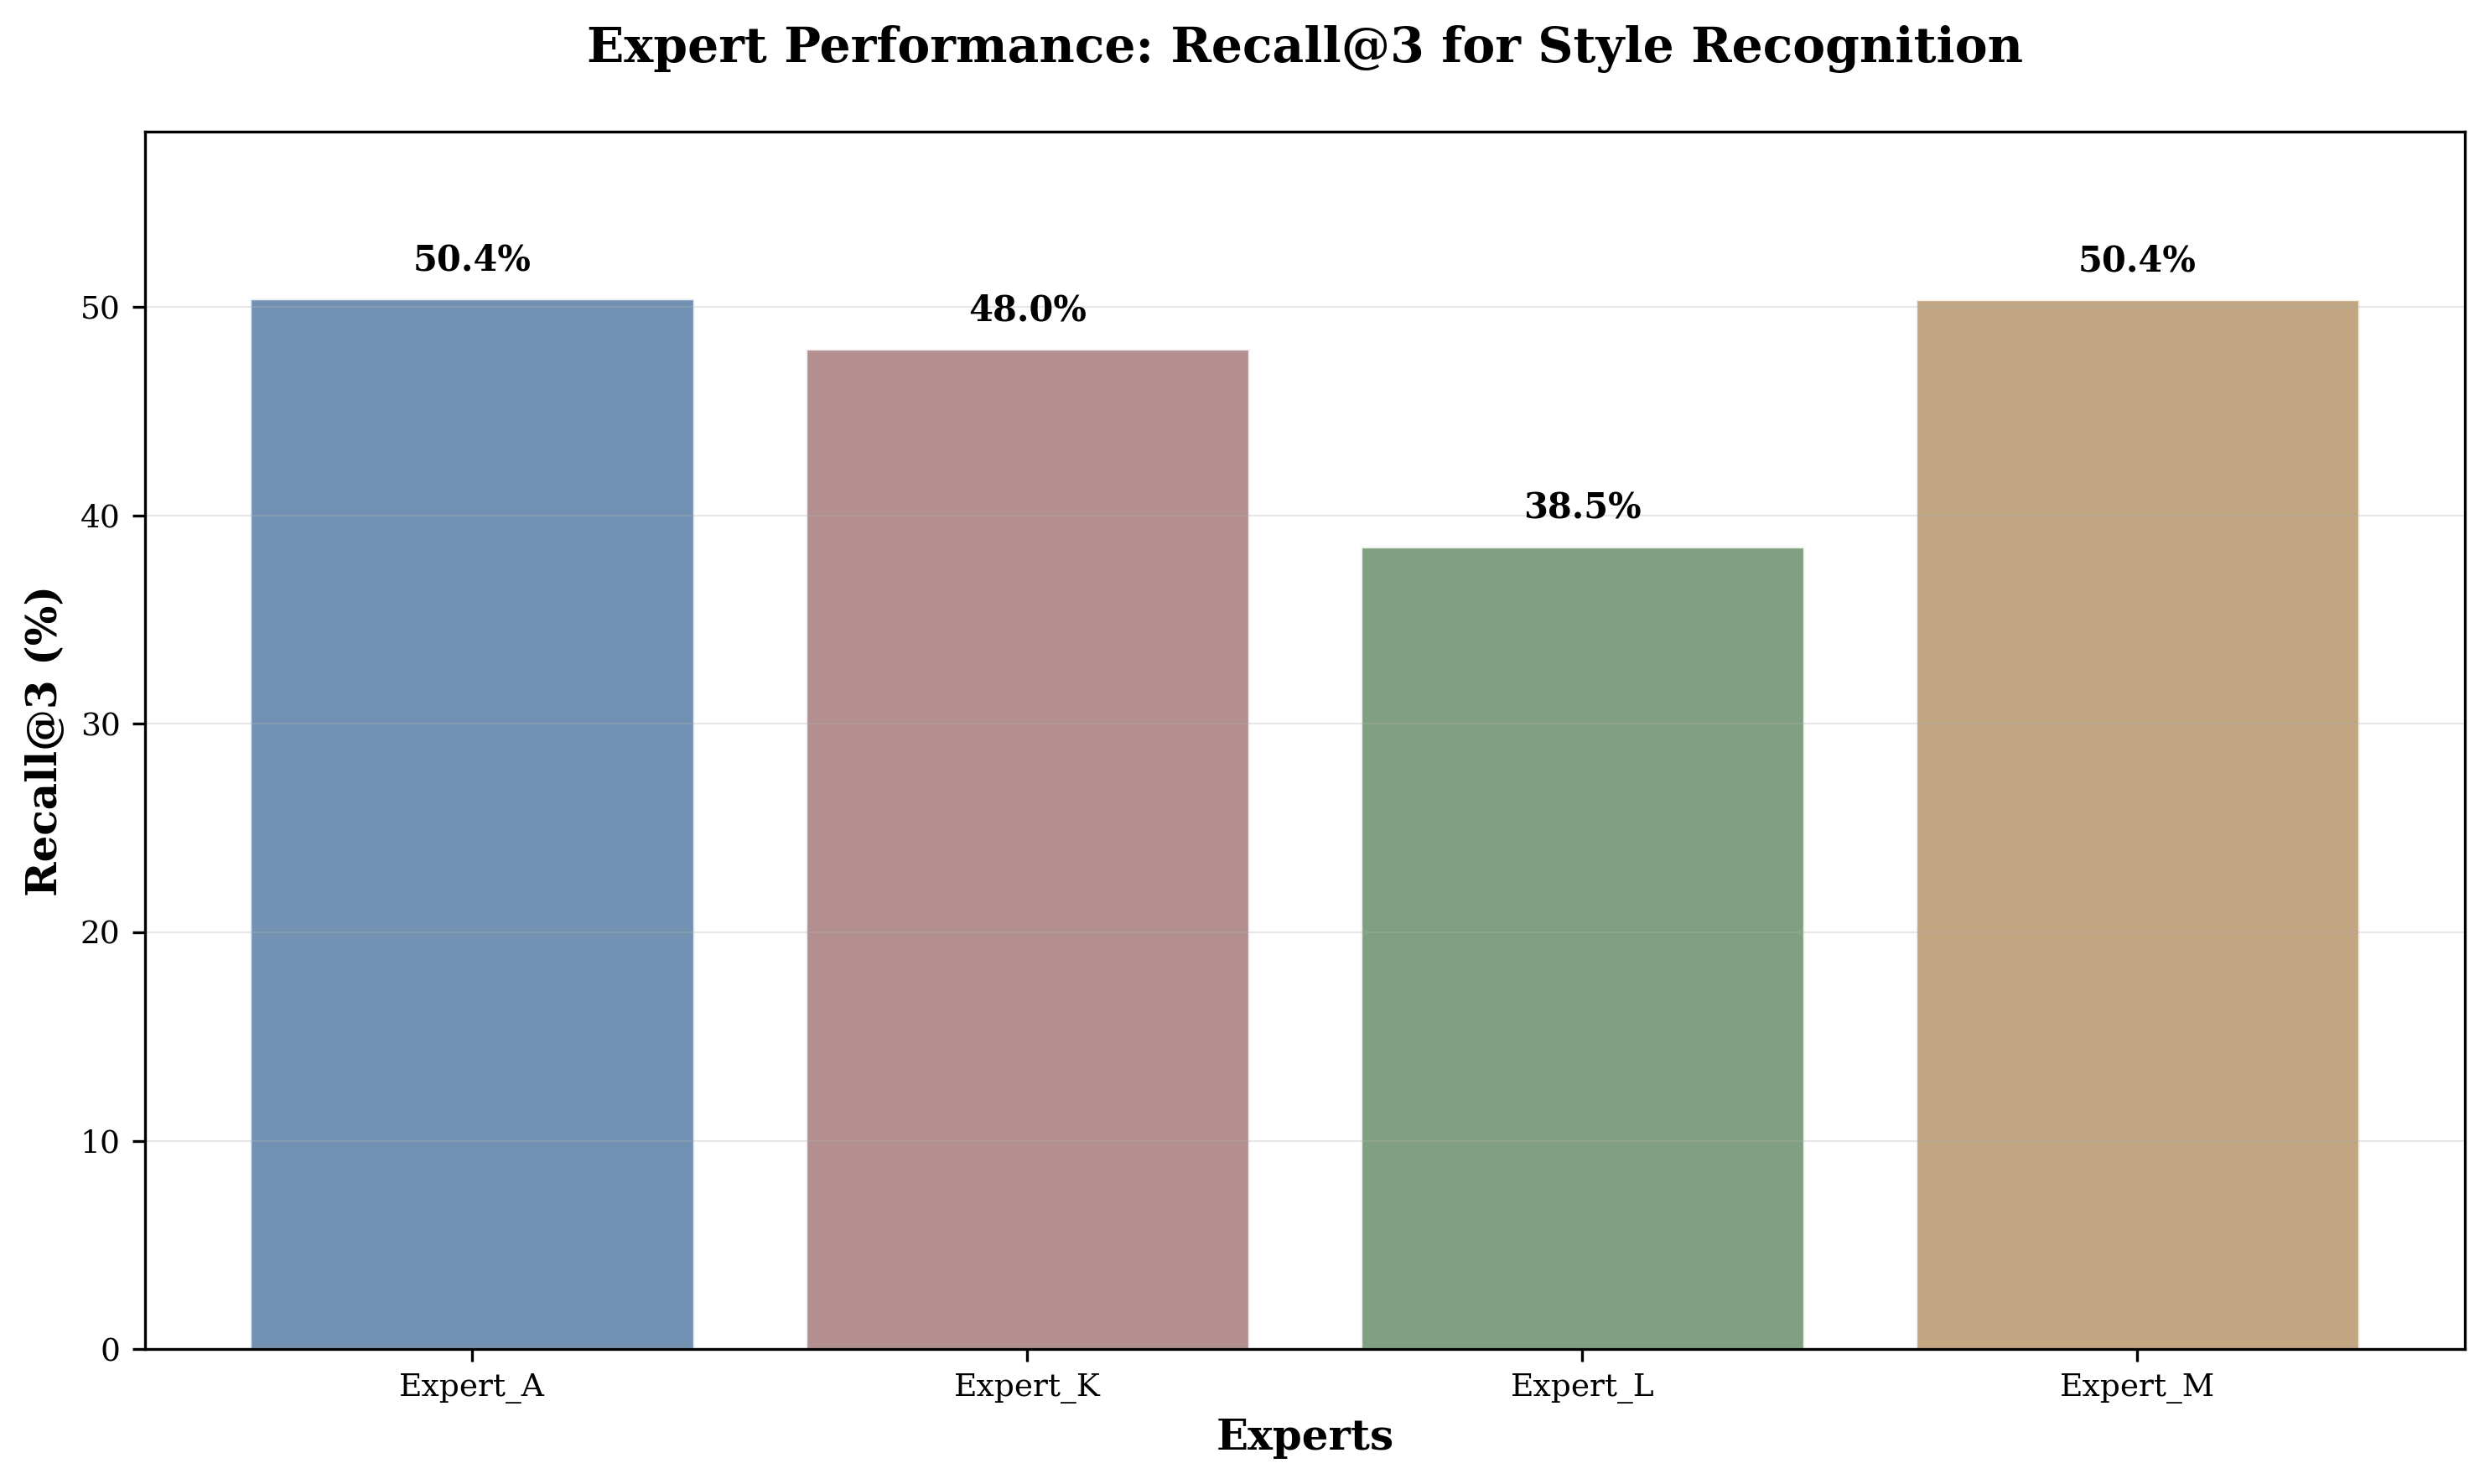

2. Style Difficulty Analysis (all 10 styles, improved)...


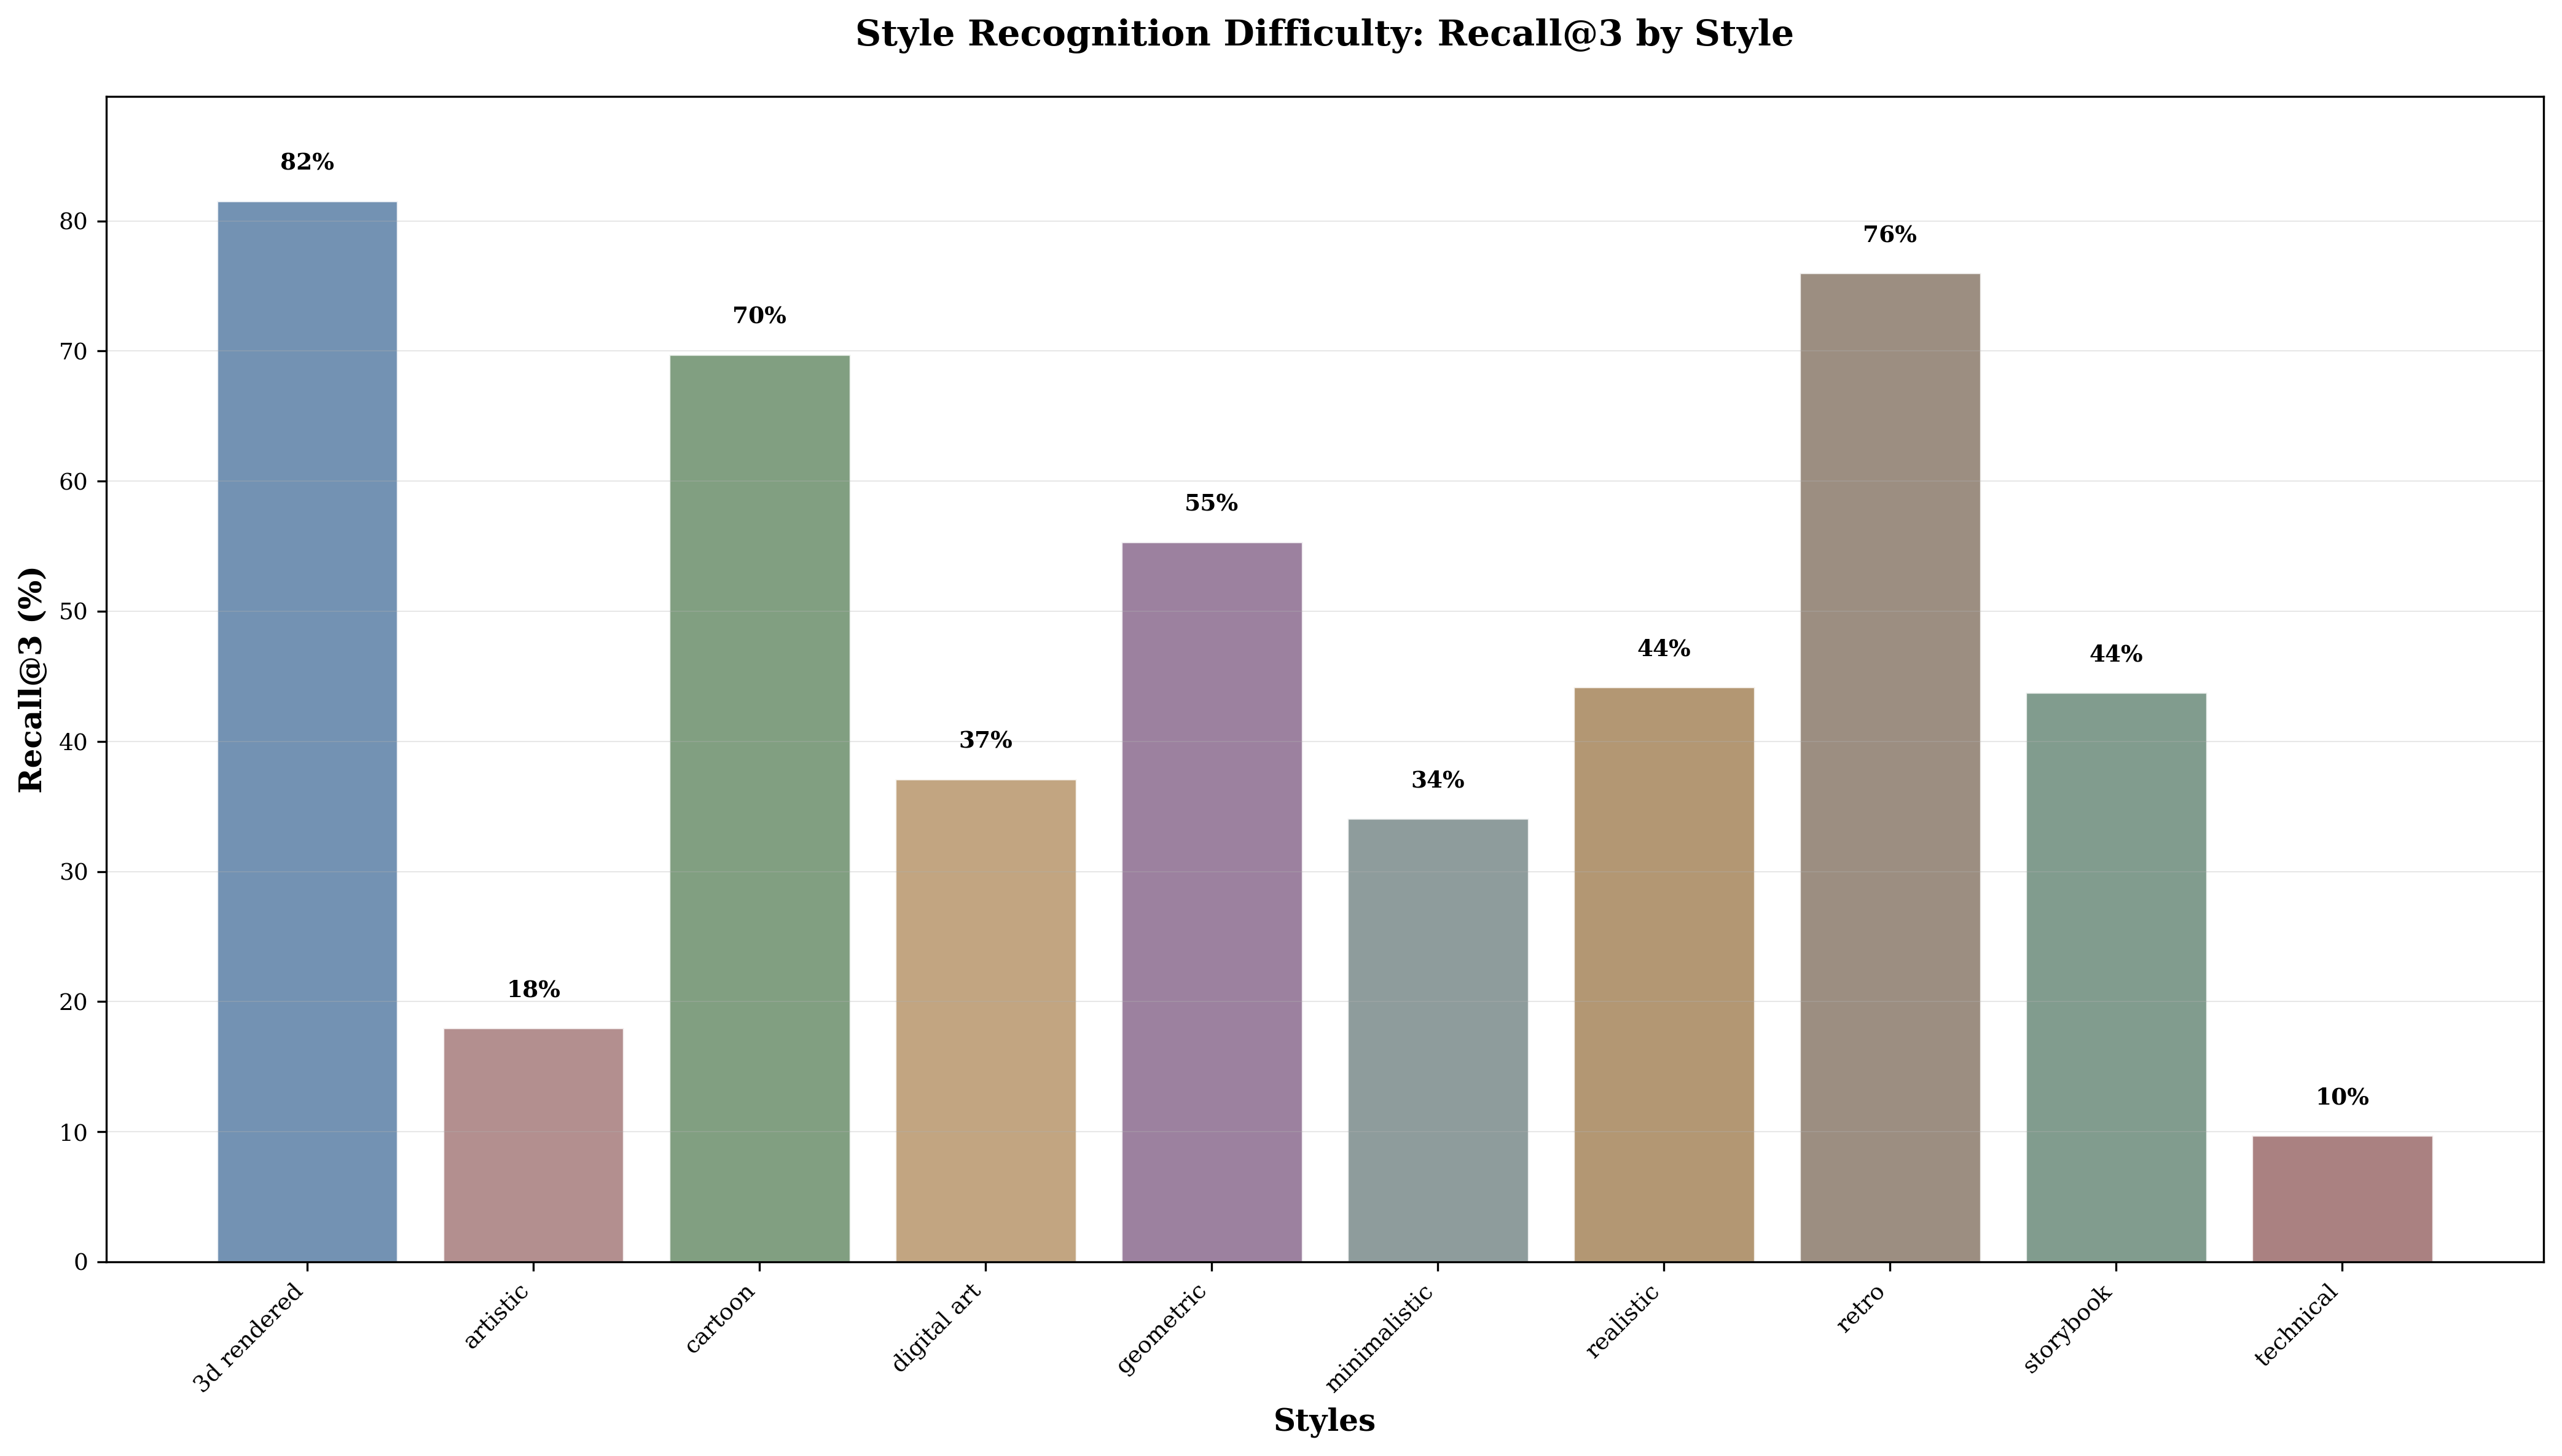

3. Style Frequency Analysis (all 10 styles, improved)...


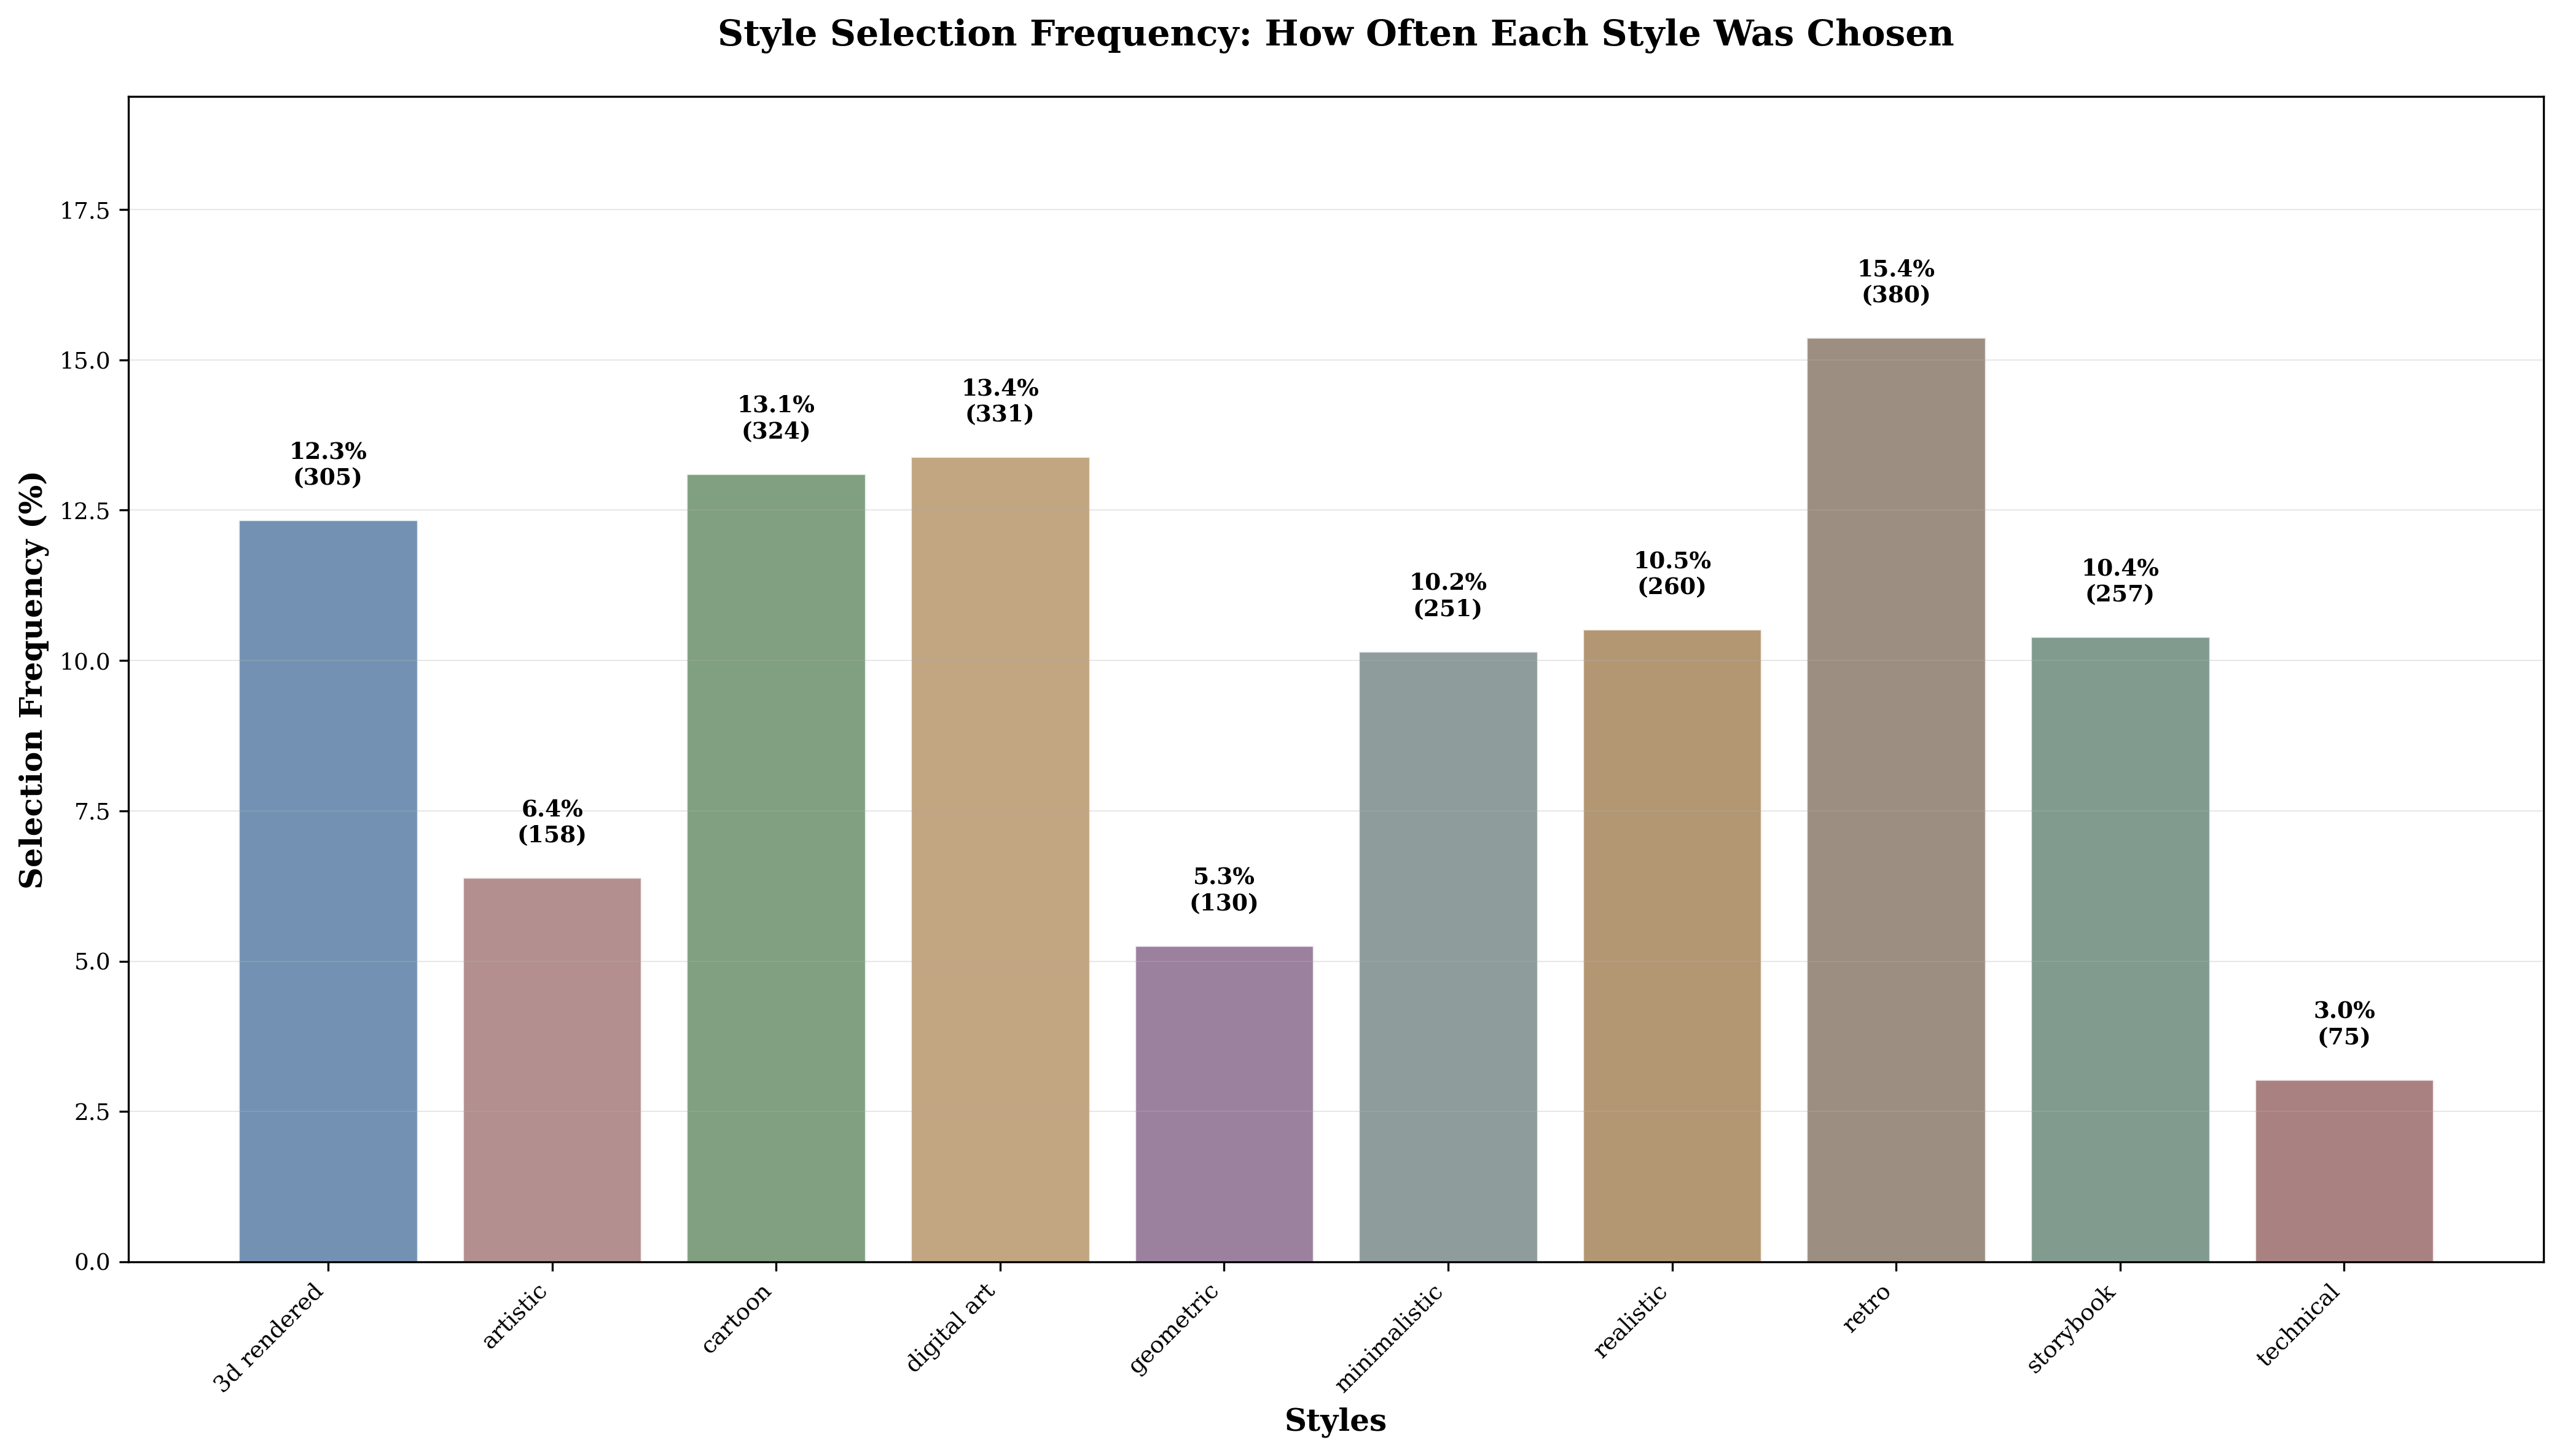

4. Expert Style Distribution Grouped (all 10 styles, improved)...


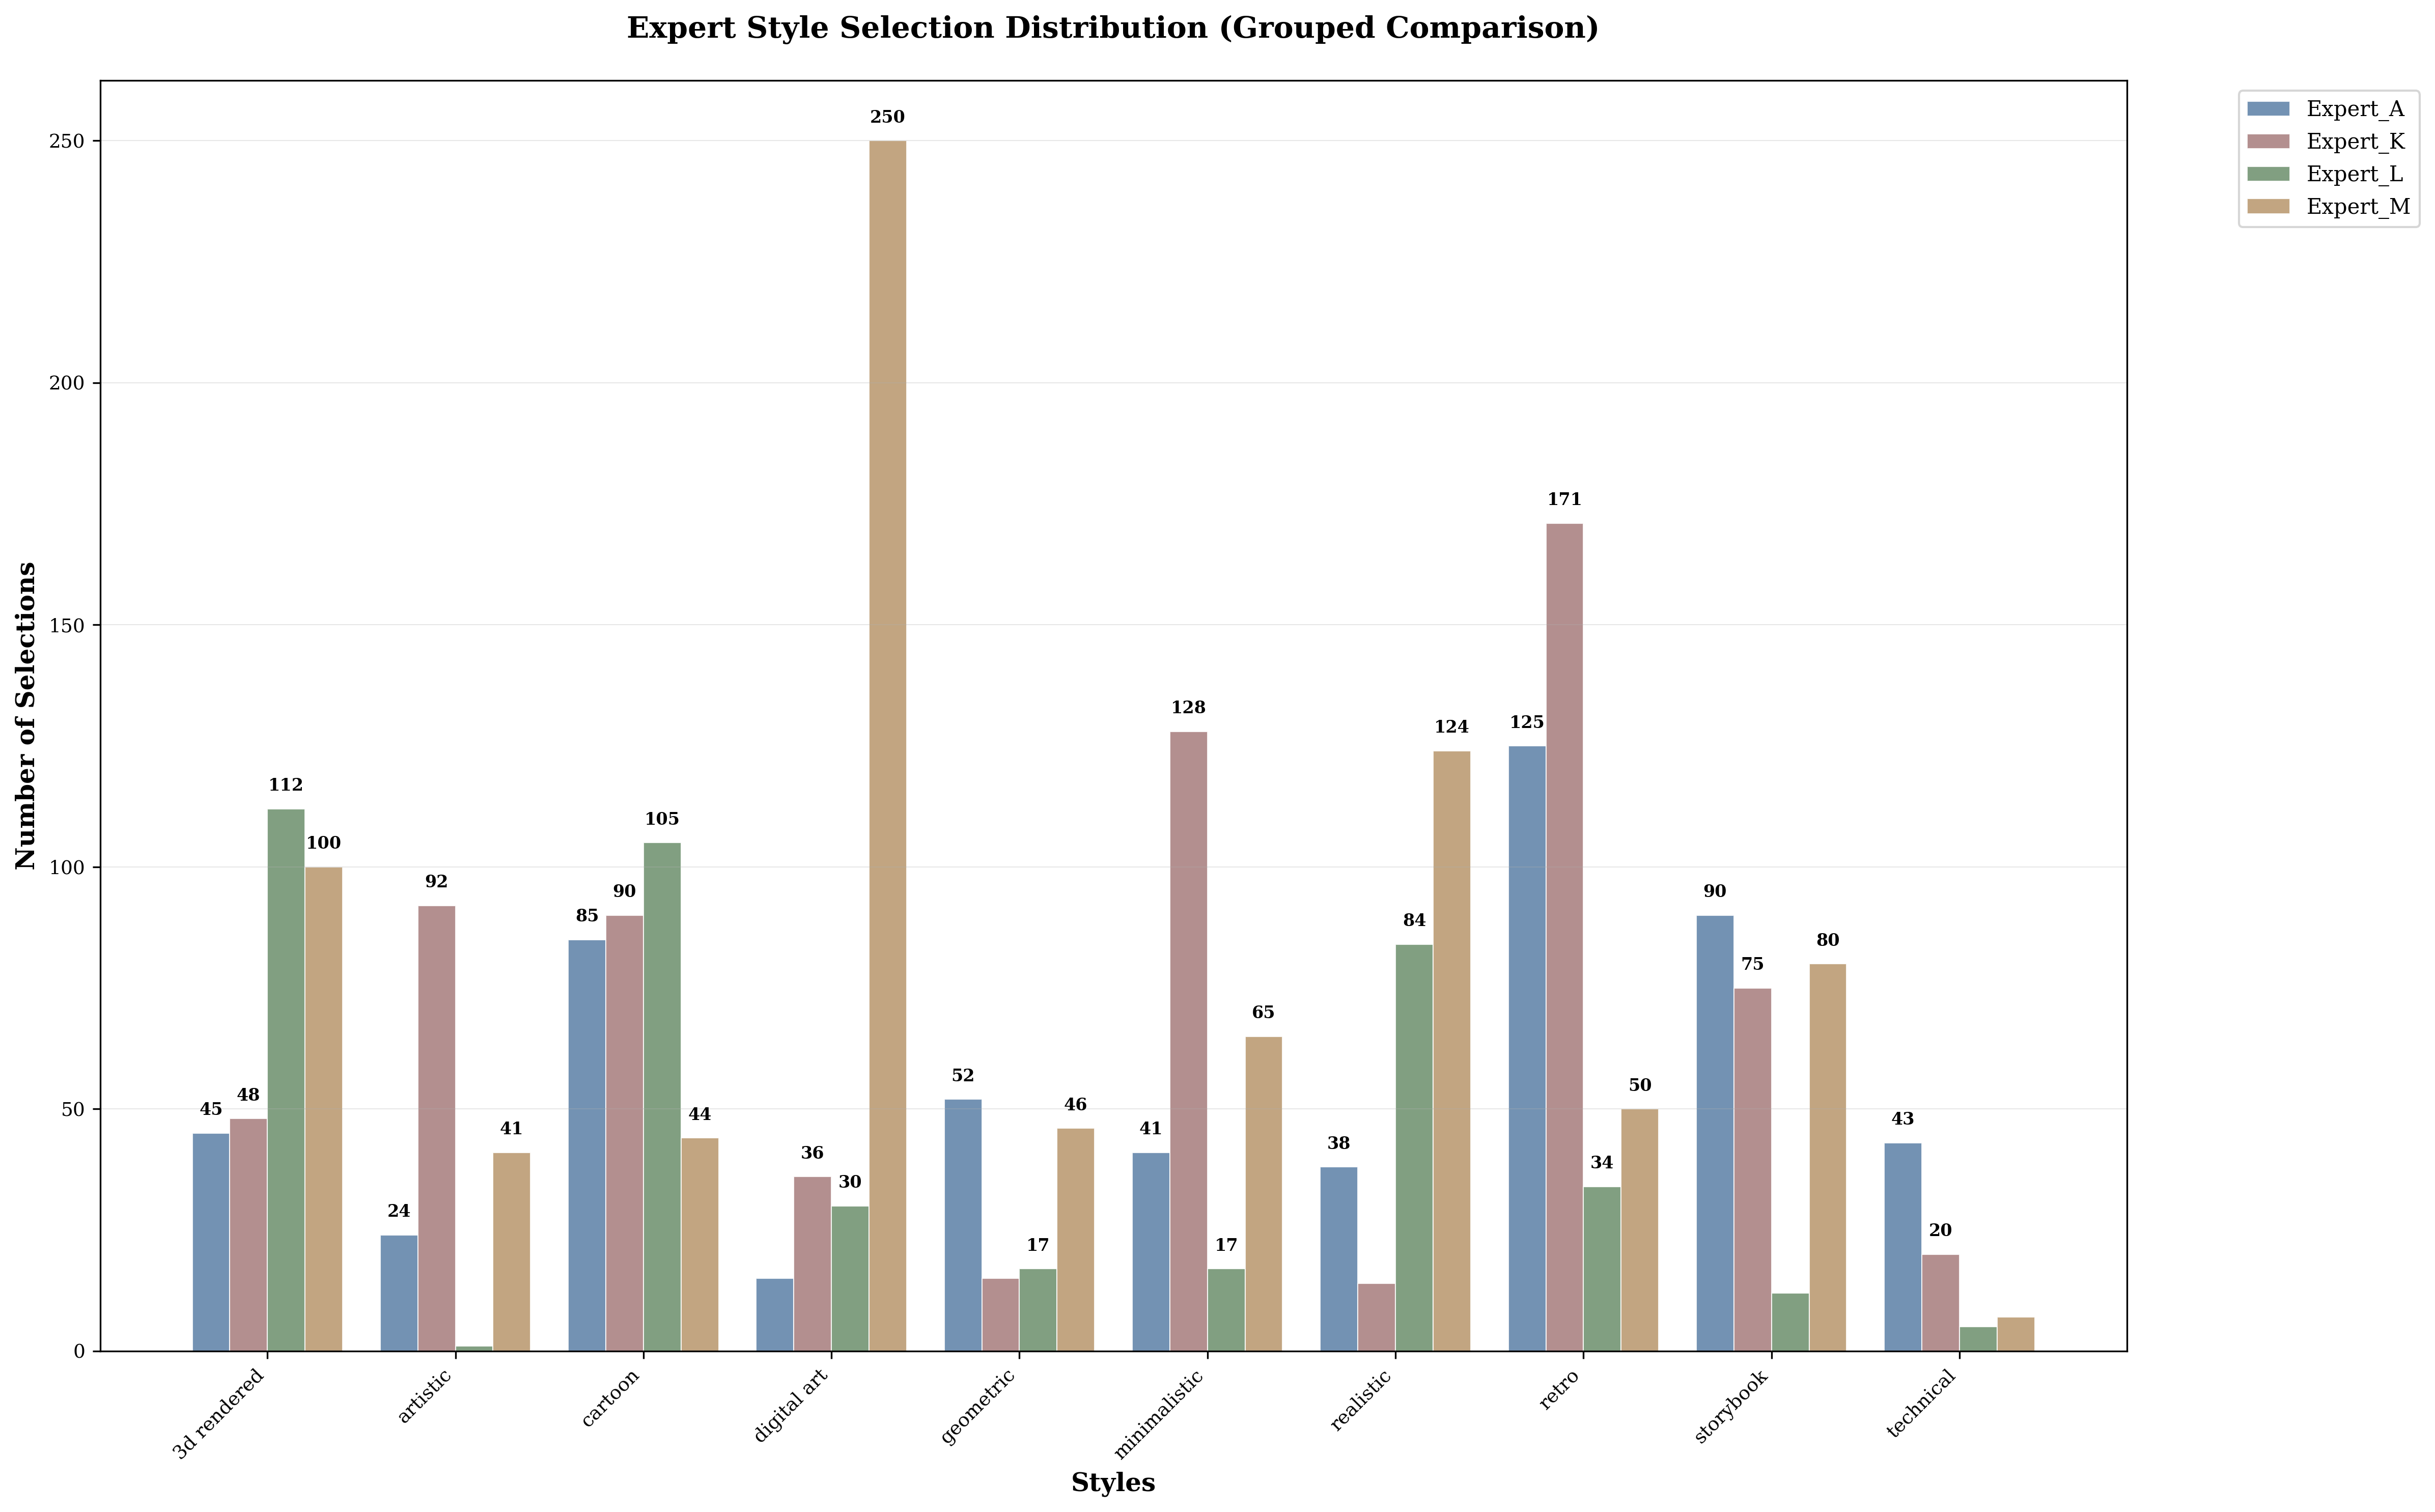

5. Individual Expert Recall Performance...


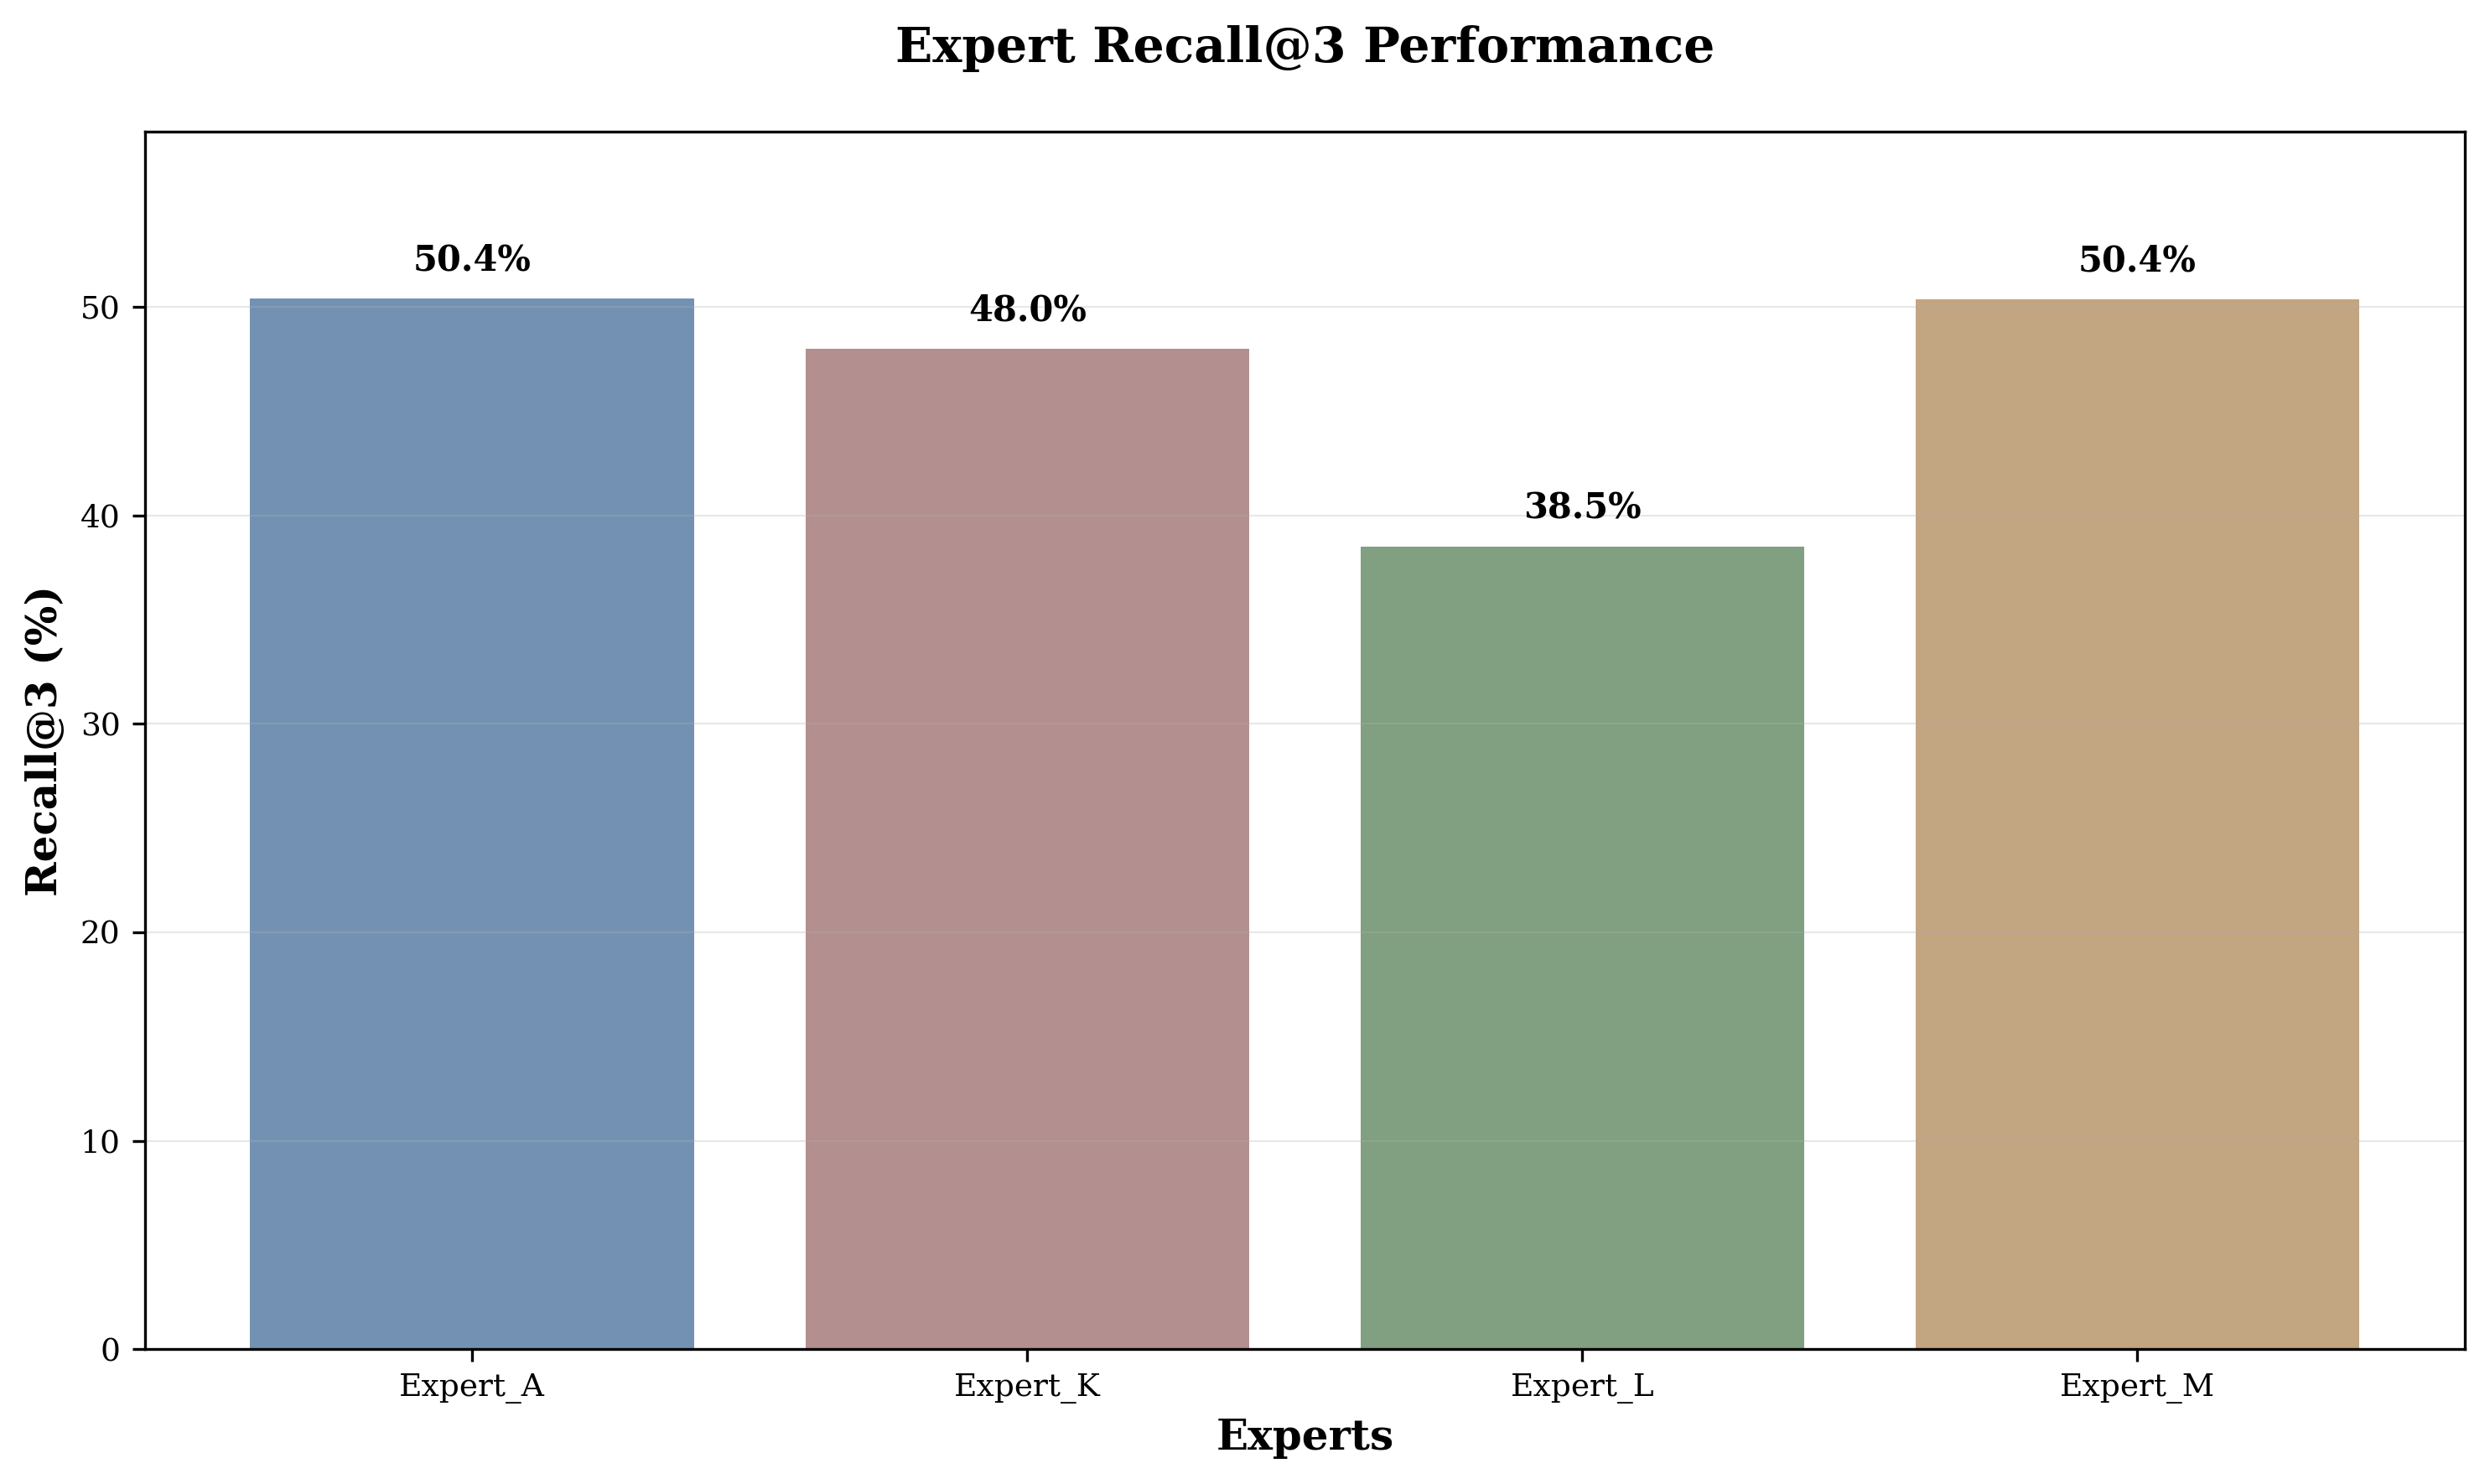

6. All Styles Difficulty Analysis...


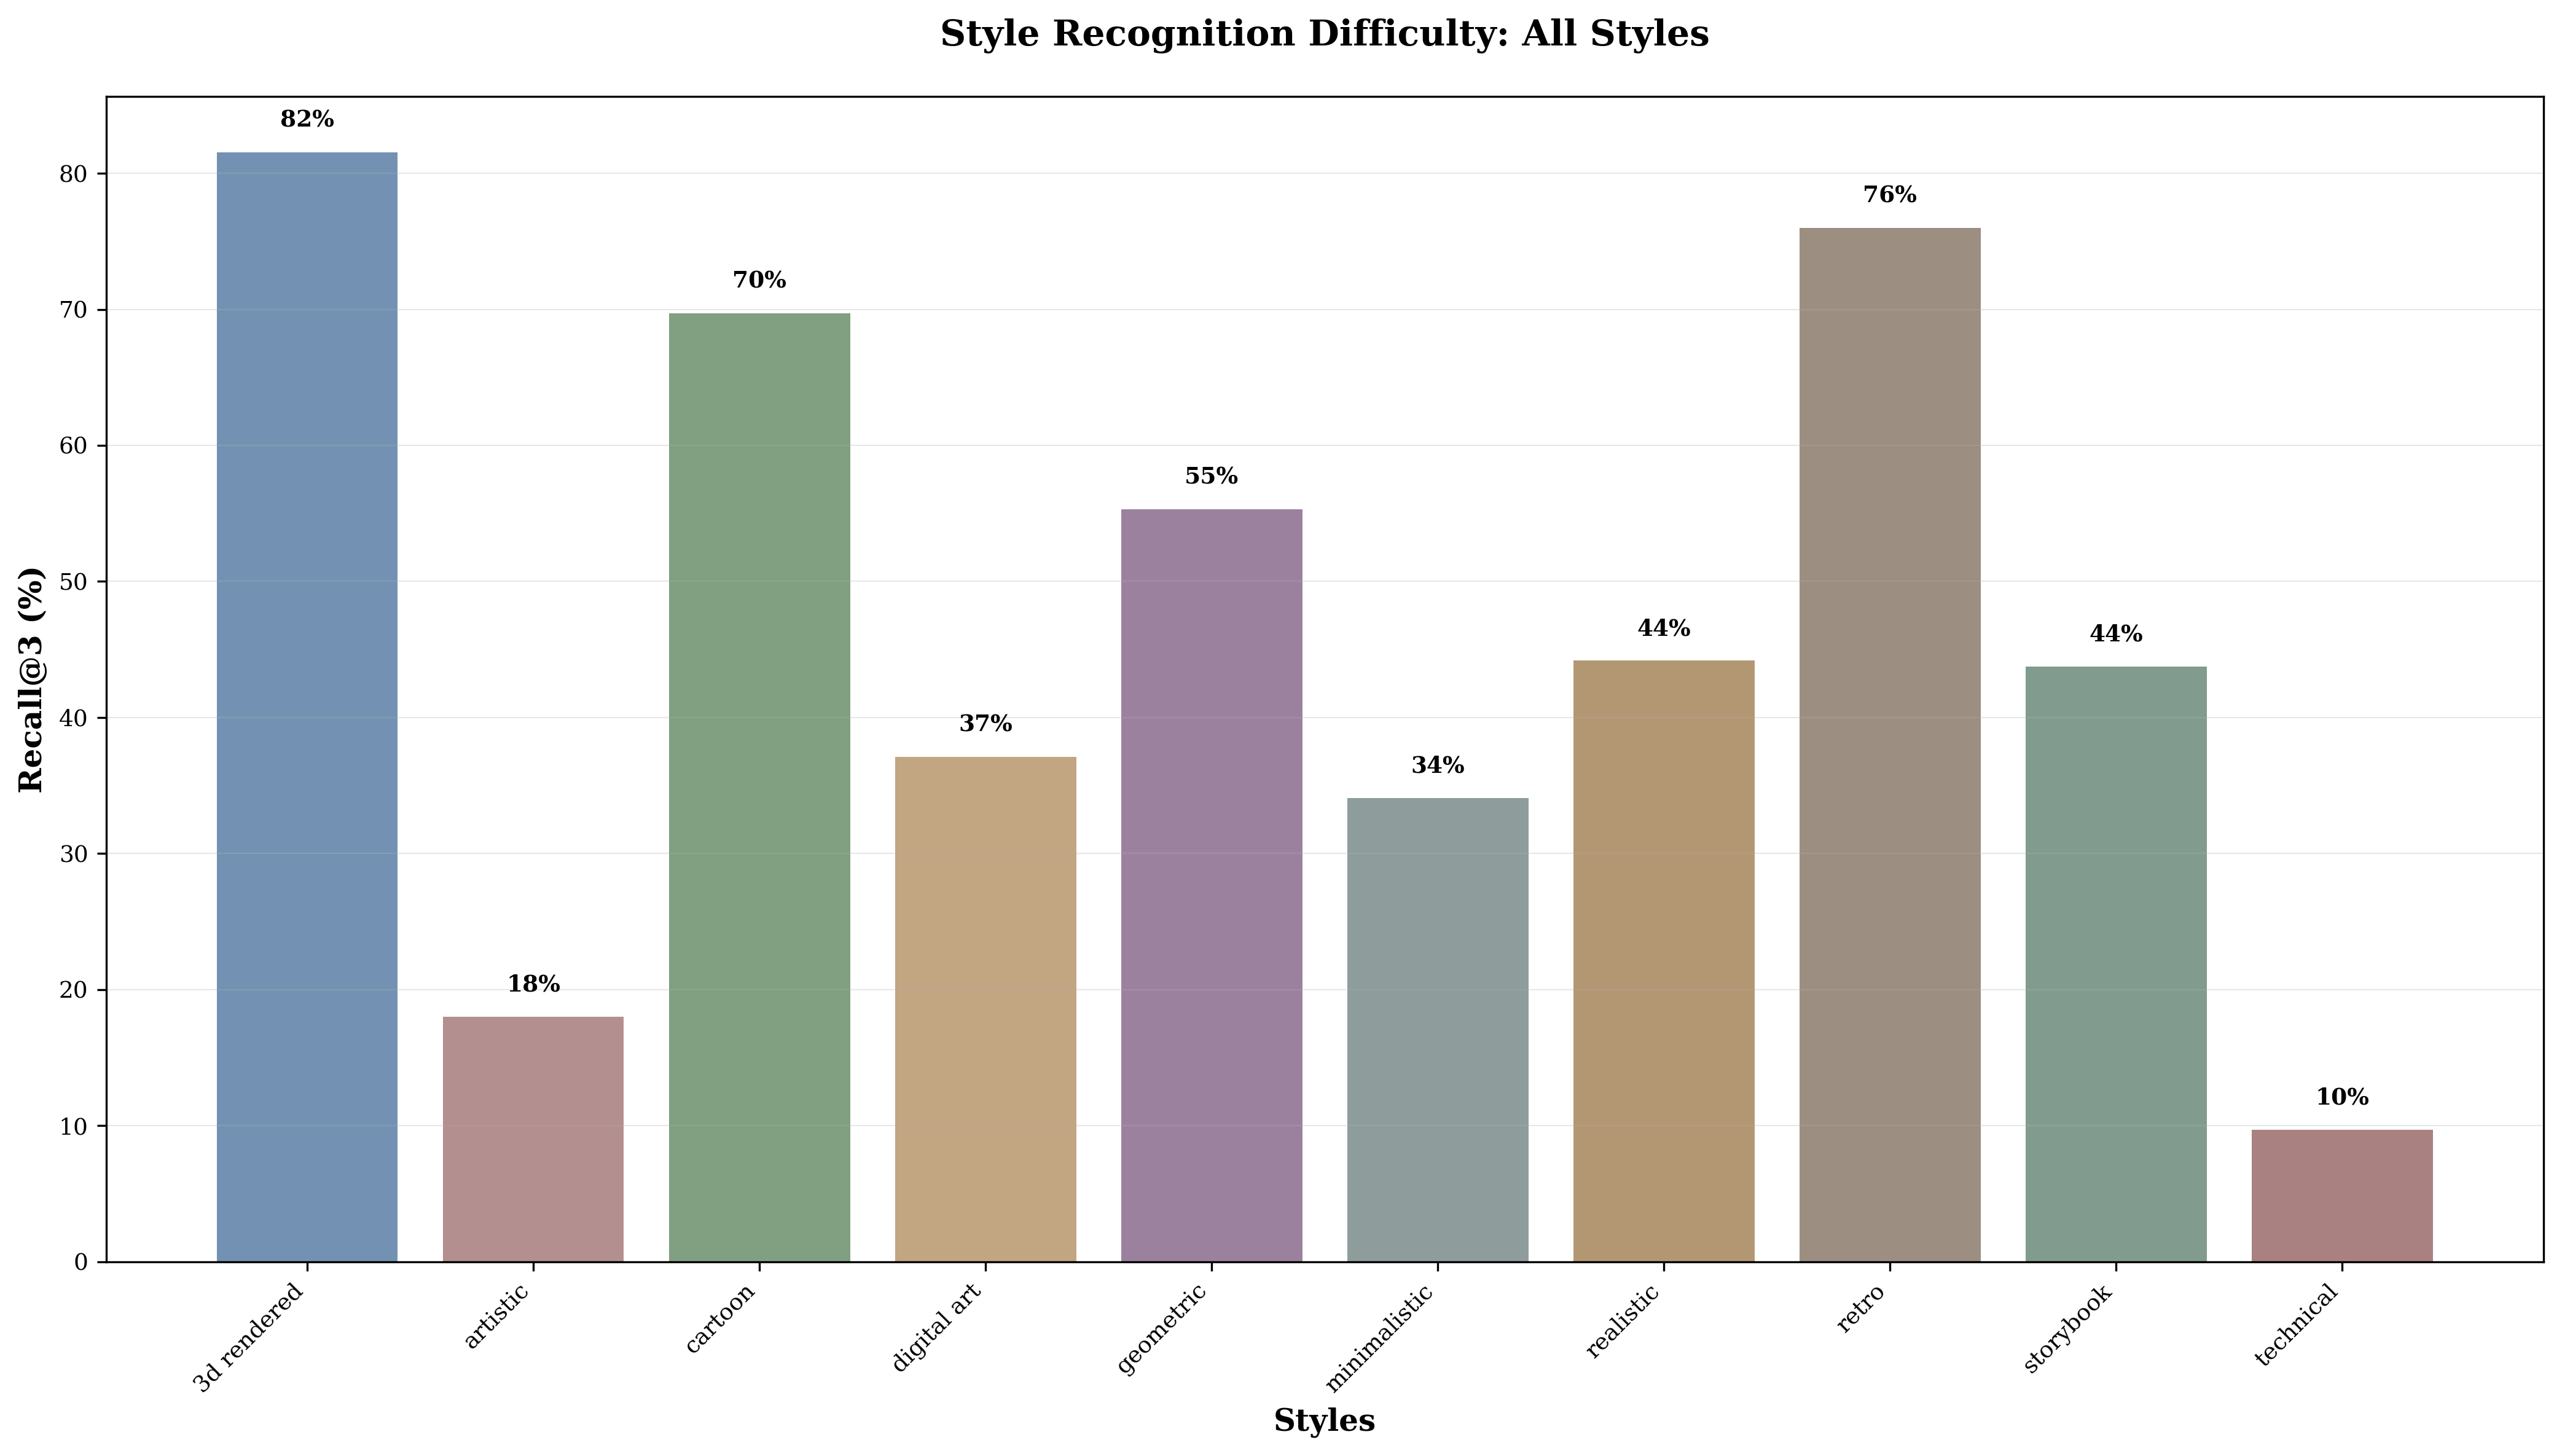

7. All Styles Frequency Analysis...


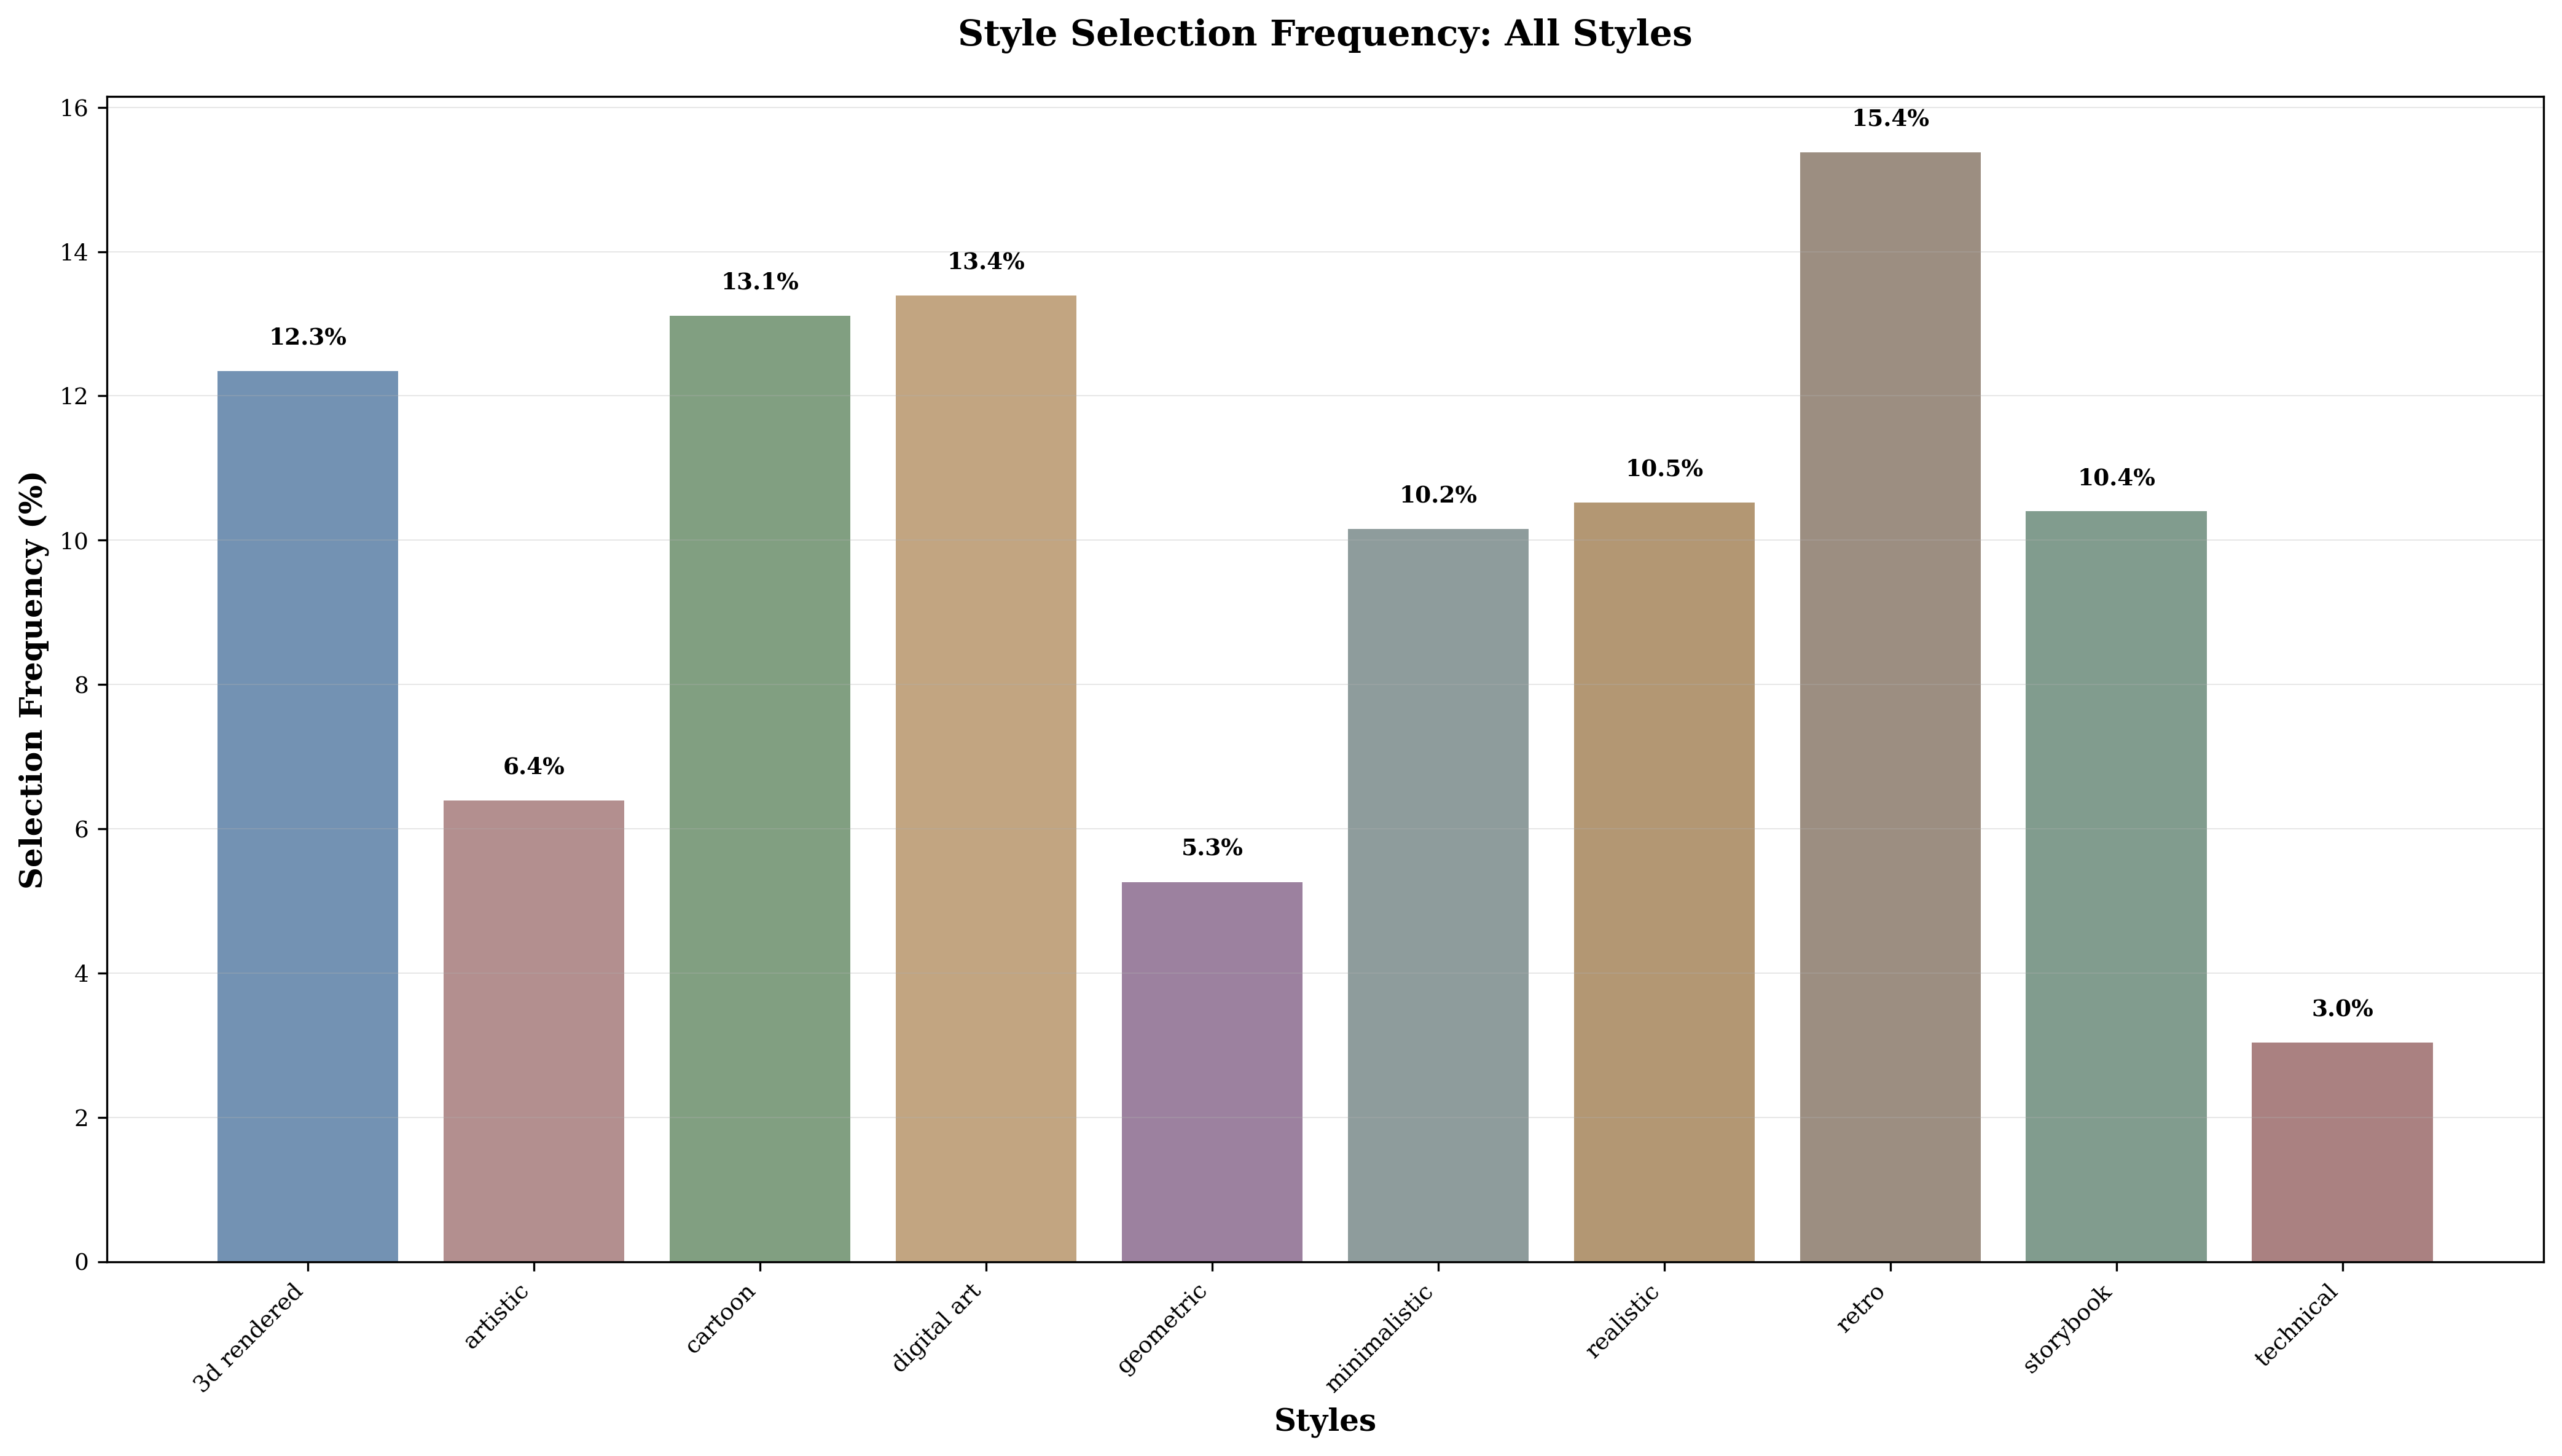

8. Individual Expert Style Preferences (including Expert L)...


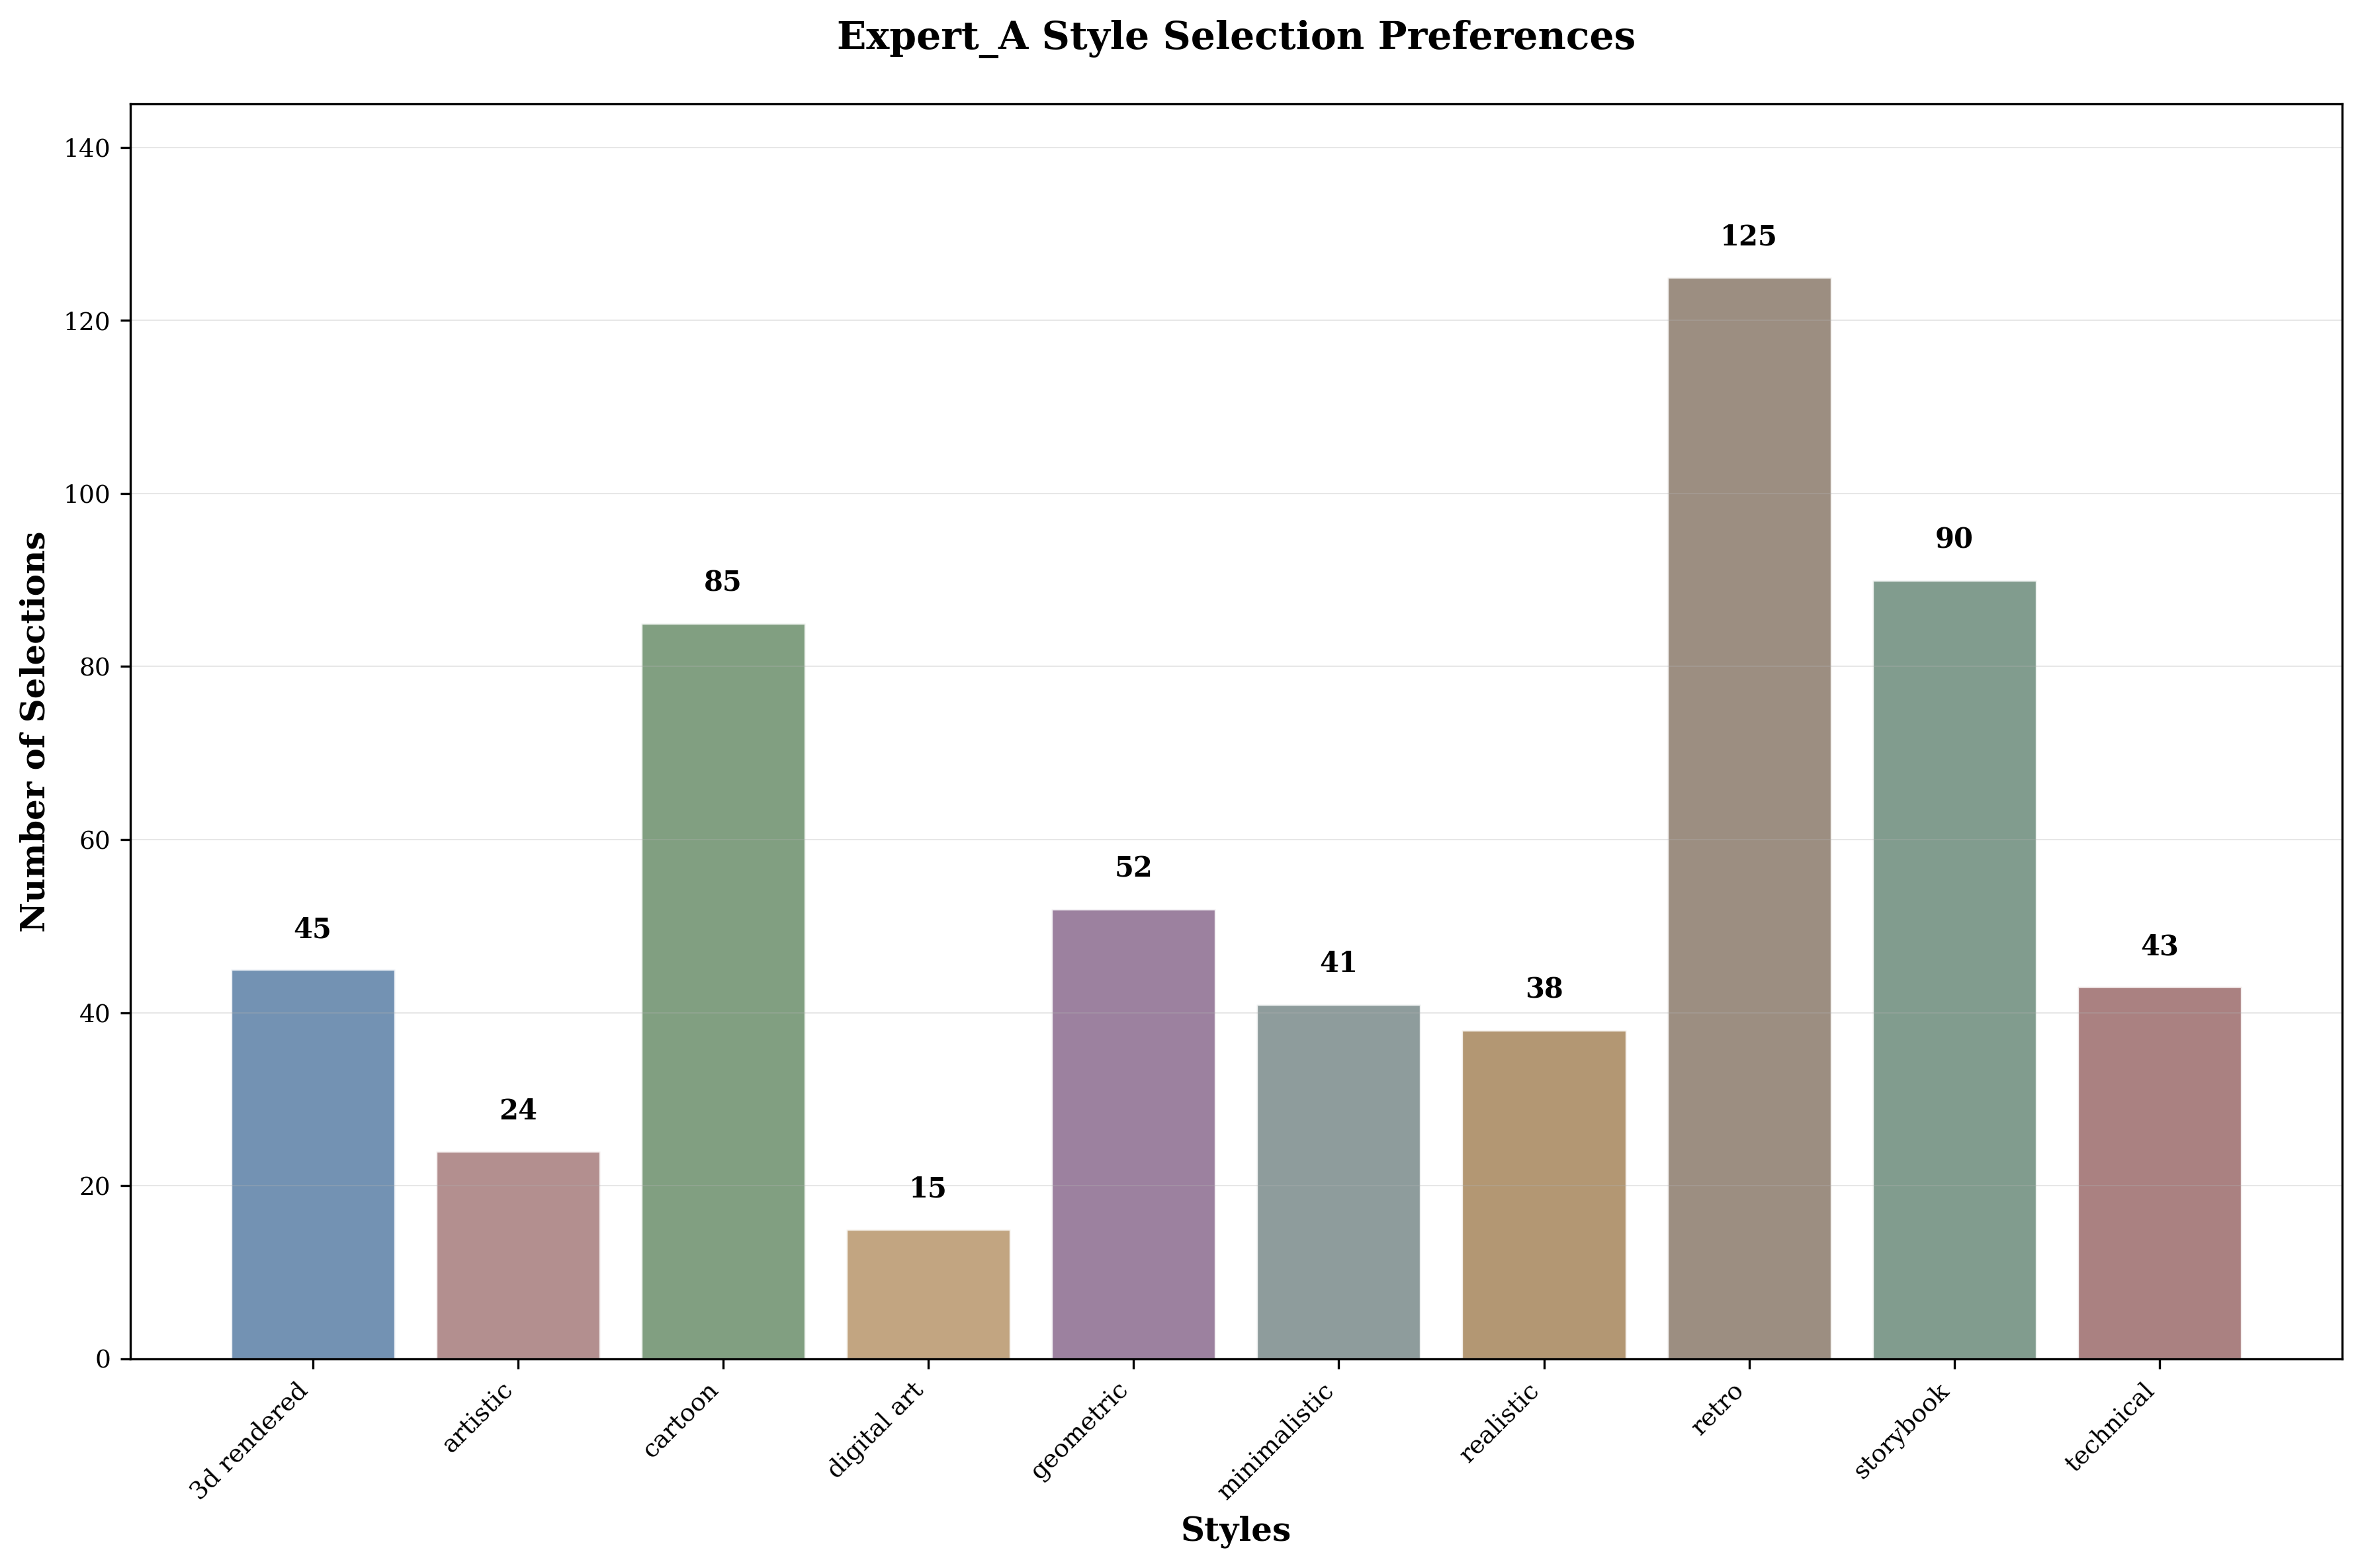

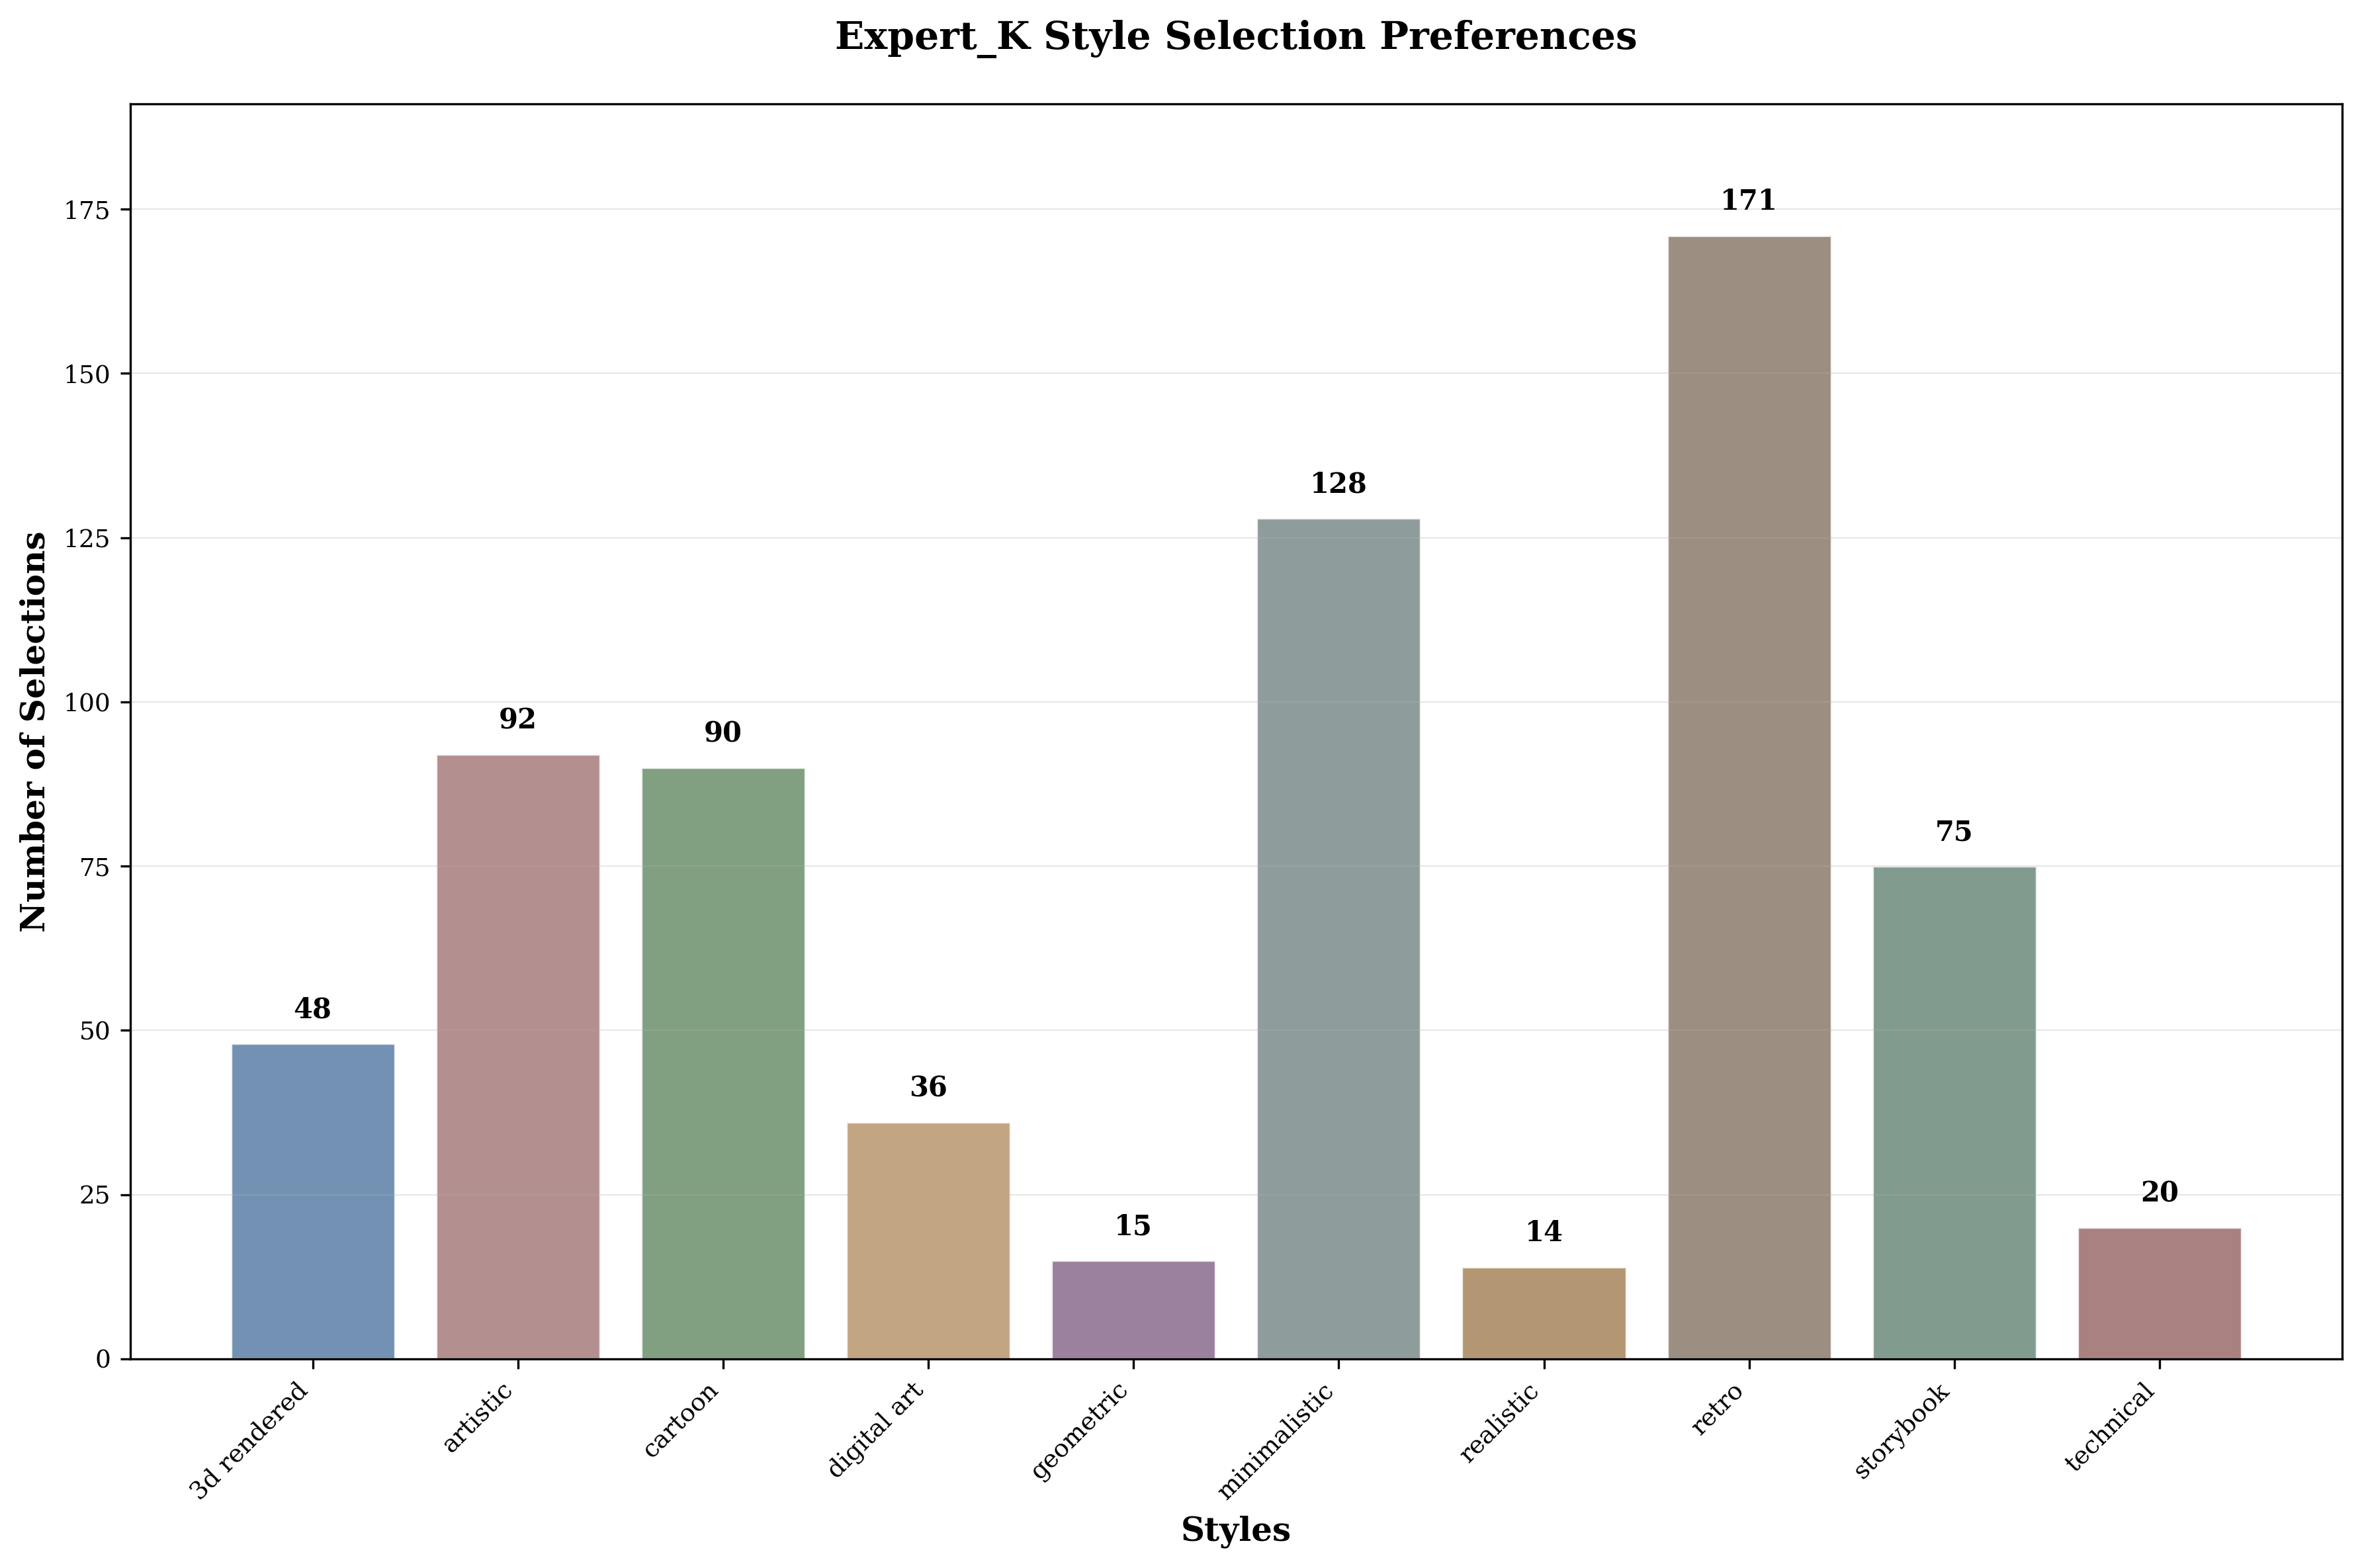

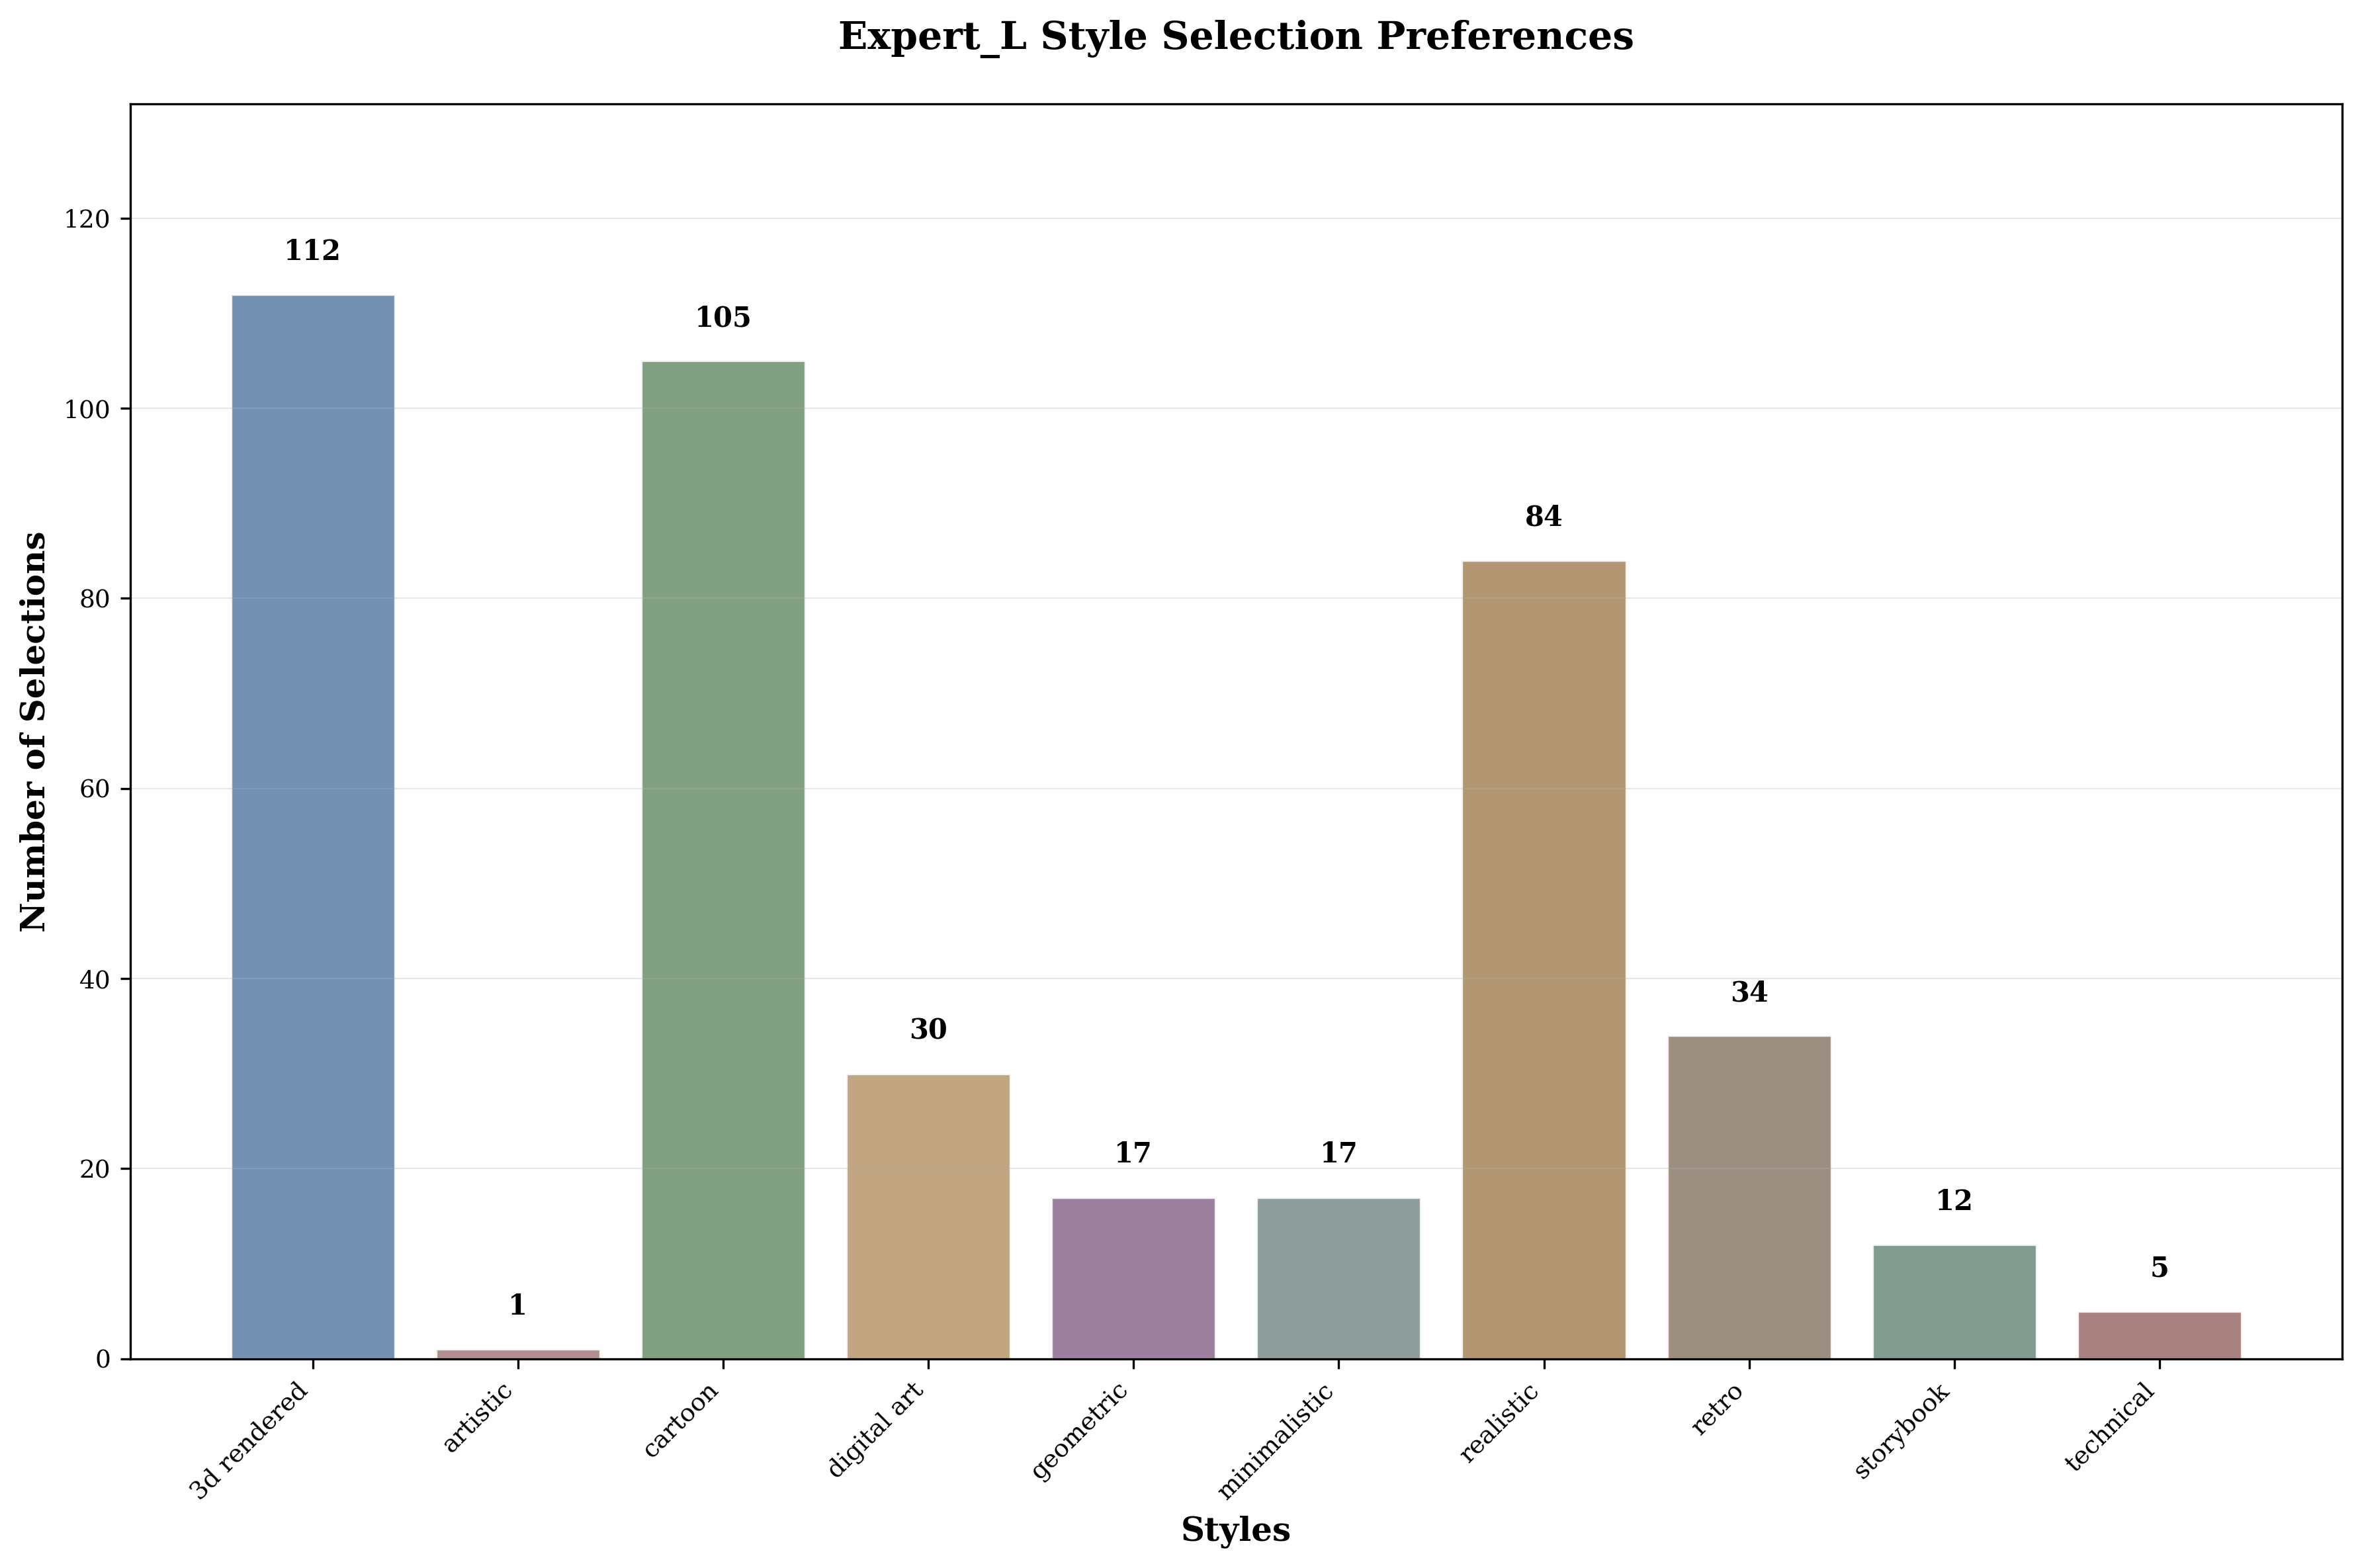

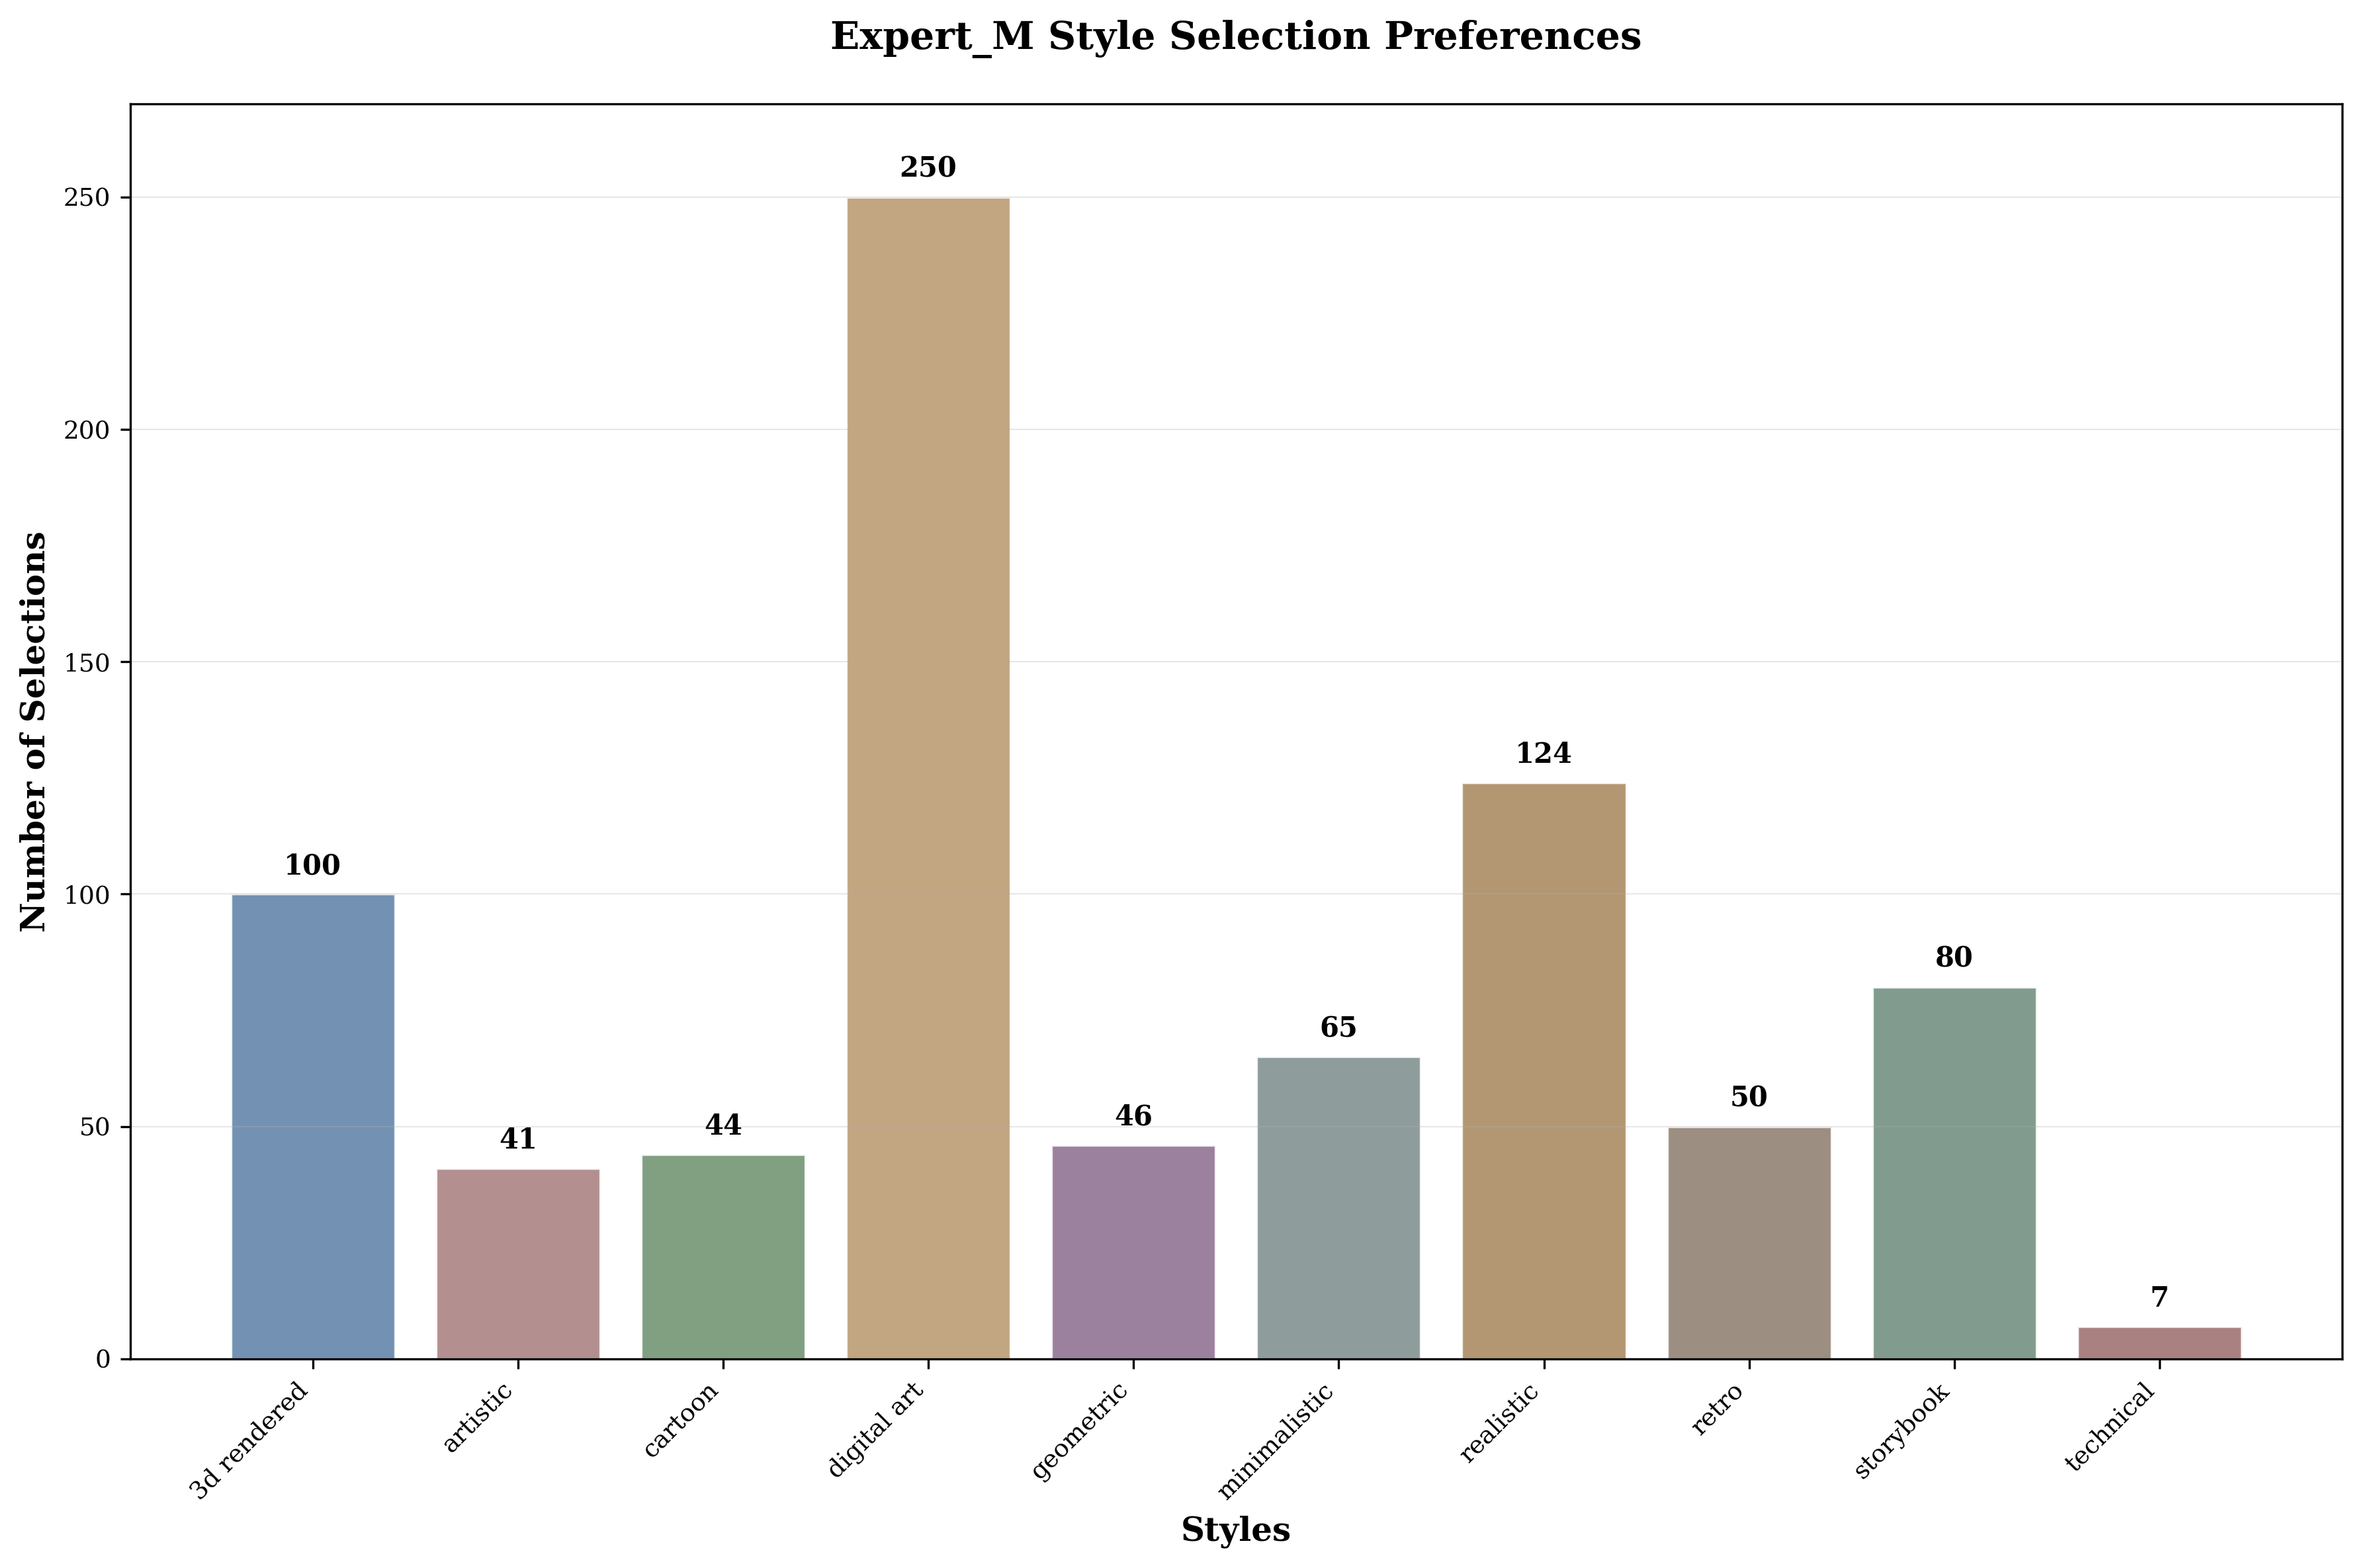

9. Merged Expert Style Preferences (side-by-side horizontal layout)...


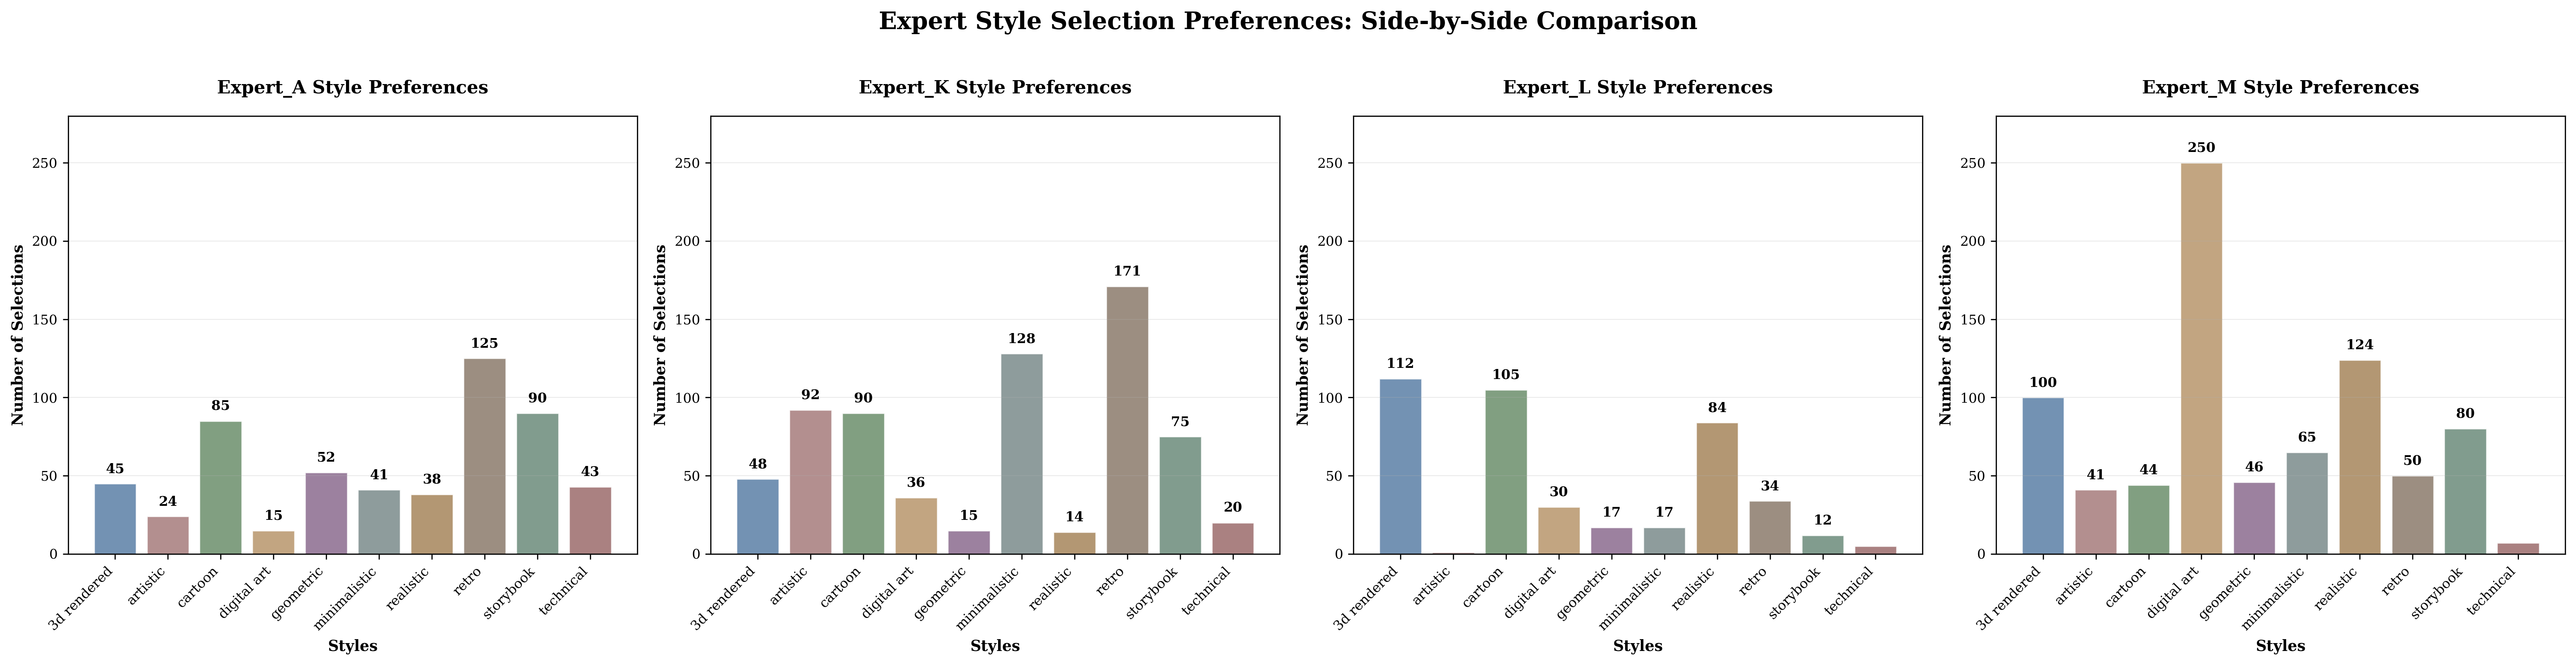


✅ All improved visualizations created successfully!
📁 Files generated:
  • expert_recall_comparison.png
  • style_difficulty_analysis.png
  • style_frequency_analysis.png
  • expert_style_distribution_grouped.png
  • expert_recall_performance.png
  • all_styles_difficulty.png
  • all_styles_frequency.png
  • expert_a_style_preferences.png
  • expert_k_style_preferences.png
  • expert_l_style_preferences.png
  • expert_m_style_preferences.png
  • merged_expert_style_preferences.png

🎯 Improvements made:
  • Fixed text overlap issues with smart positioning
  • Removed heatmap and selection patterns charts
  • All charts now show ALL 10 styles in consistent order
  • Uniform color scheme across all visualizations
  • Better spacing and readability


In [13]:
"""
Improved Style Recognition Analysis Visualizations
=================================================

This script creates improved visualizations for the style recognition analysis
with better text positioning, consistent style ordering, and uniform colors.

Author: Style Analysis Visualization (Improved)
Date: June 2025
"""

import json
import csv
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter, defaultdict
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# CONFIGURATION AND SETUP
# ============================================================================

# File paths
ANNOTATION_DIR = r"C:\Users\SouayedBelkiss\OneDrive - gae\Desktop\Thesis\annotation_analysis\expert work"
MAPPING_DIR = r"C:\Users\SouayedBelkiss\OneDrive - gae\Desktop\Thesis\annotation_analysis\required files"

ANNOTATION_FILES = {
    'Expert_A': 'alexa_annotations.json',
    'Expert_K': 'katrin_annotations.json', 
    'Expert_L': 'luisa_annotations.json',
    'Expert_M': 'martin_annotations.json'
}

# Set publication-quality style parameters
plt.rcParams.update({
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'figure.titlesize': 14,
    'font.family': 'serif',
    'axes.linewidth': 0.8,
    'grid.linewidth': 0.5,
    'lines.linewidth': 1.0
})

# Define expert colors
EXPERT_COLORS = {
    'Expert_A': '#5B7FA6',      # Muted steel blue
    'Expert_K': '#A67C7C',      # Muted dusty rose  
    'Expert_L': '#6B8E6B',      # Muted sage green
    'Expert_M': '#B8956B',      # Muted golden brown
}

# CONSISTENT STYLE ORDER AND COLORS - this will be used throughout all visualizations
GROUND_TRUTH_STYLES = ['3d rendered', 'artistic', 'cartoon', 'digital art', 'geometric', 
                      'minimalistic', 'realistic', 'retro', 'storybook', 'technical']

STYLE_COLORS = {
    '3d rendered': '#5B7FA6',    # Steel blue
    'artistic': '#A67C7C',       # Dusty rose
    'cartoon': '#6B8E6B',        # Sage green
    'digital art': '#B8956B',    # Golden brown
    'geometric': '#8B6B8E',      # Muted purple
    'minimalistic': '#7A8B8B',   # Blue-gray
    'realistic': '#A6855B',      # Warm brown
    'retro': '#8B7A6B',          # Taupe
    'storybook': '#6B8B7A',      # Forest green
    'technical': '#9B6B6B',      # Muted red
}

# ============================================================================
# DATA LOADING FUNCTIONS (keeping your working code)
# ============================================================================

def normalize_style_name(style_name):
    """Normalize style names for consistent matching"""
    return style_name.lower().strip()

def load_ground_truth_mapping():
    """Load the mapping file to get ground truth styles for each image"""
    mapping_file = os.path.join(MAPPING_DIR, 'renamed_images_mapping.csv')
    
    ground_truth = {}
    try:
        with open(mapping_file, 'r', encoding='utf-8') as f:
            reader = csv.DictReader(f)
            for row in reader:
                filename = row['new_filename']
                style = normalize_style_name(row['style'])
                ground_truth[filename] = style
        return ground_truth
    except Exception as e:
        print(f"❌ Error loading ground truth mapping: {e}")
        return {}

def load_expert_annotations():
    """Load all expert annotations with style selections"""
    all_annotations = {}
    
    for expert_name, filename in ANNOTATION_FILES.items():
        filepath = os.path.join(ANNOTATION_DIR, filename)
        
        try:
            with open(filepath, 'r', encoding='utf-8') as f:
                data = json.load(f)
            
            expert_annotations = {}
            
            for record in data:
                # Get image filename and extract numerical part
                image_filename = record['data'].get('original_filename', '')
                
                # Extract just the numerical part (e.g., "0008_IAA.png" -> "0008.png")
                if image_filename:
                    base_name = image_filename.replace('_IAA', '').replace('.png', '') + '.png'
                    image_key = base_name
                else:
                    continue
                
                # Extract style selections
                if record['annotations']:
                    annotation = record['annotations'][0]
                    
                    for item in annotation['result']:
                        if item['from_name'] == 'image_style' and item['type'] == 'choices':
                            styles_selected = item['value']['choices']
                            
                            # Normalize style names and limit to top 3 if more than 3 selected
                            normalized_styles = [normalize_style_name(style) for style in styles_selected]
                            top_3_styles = normalized_styles[:3]  # Take first 3 if more than 3
                            
                            expert_annotations[image_key] = {
                                'styles_selected': top_3_styles,
                                'num_selected': len(normalized_styles),
                                'original_selection': styles_selected
                            }
                            break
            
            all_annotations[expert_name] = expert_annotations
            
        except Exception as e:
            print(f"❌ Error loading {expert_name}: {e}")
    
    return all_annotations

def calculate_recall_data():
    """Calculate recall data for visualizations"""
    ground_truth = load_ground_truth_mapping()
    expert_annotations = load_expert_annotations()
    
    results = {
        'expert_performance': {},
        'style_difficulty': defaultdict(lambda: {'correct': 0, 'total': 0}),
        'style_frequency': Counter(),
        'expert_style_selections': {},
    }
    
    # Calculate data
    for expert_name, annotations in expert_annotations.items():
        expert_correct = 0
        expert_total = 0
        expert_style_selections = Counter()
        
        for image_filename, annotation in annotations.items():
            if image_filename in ground_truth:
                true_style = ground_truth[image_filename]
                selected_styles = annotation['styles_selected']
                
                # Count style selections
                for style in selected_styles:
                    expert_style_selections[style] += 1
                    results['style_frequency'][style] += 1
                
                expert_total += 1
                results['style_difficulty'][true_style]['total'] += 1
                
                # Check if ground truth style is in top 3 selections
                if true_style in selected_styles:
                    expert_correct += 1
                    results['style_difficulty'][true_style]['correct'] += 1
        
        # Store expert results
        expert_recall = expert_correct / expert_total if expert_total > 0 else 0
        results['expert_performance'][expert_name] = {
            'recall': expert_recall,
            'correct': expert_correct,
            'total': expert_total
        }
        results['expert_style_selections'][expert_name] = expert_style_selections
    
    # Calculate style difficulty
    for style in results['style_difficulty']:
        data = results['style_difficulty'][style]
        data['recall'] = data['correct'] / data['total'] if data['total'] > 0 else 0
    
    return results

# ============================================================================
# IMPROVED VISUALIZATION FUNCTIONS
# ============================================================================

def create_expert_recall_comparison(results):
    """Create expert recall@3 comparison chart with improved text positioning"""
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    experts = list(results['expert_performance'].keys())
    recalls = [results['expert_performance'][exp]['recall'] * 100 for exp in experts]
    colors = [EXPERT_COLORS[exp] for exp in experts]
    
    bars = ax.bar(experts, recalls, color=colors, alpha=0.85, 
                  edgecolor='white', linewidth=0.8)
    
    # Add value labels above bars with sufficient spacing
    for bar, recall in zip(bars, recalls):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{recall:.1f}%', ha='center', va='bottom', 
                fontweight='bold', fontsize=10)
    
    ax.set_title('Expert Performance: Recall@3 for Style Recognition', 
                 fontweight='bold', fontsize=14, pad=20)
    ax.set_ylabel('Recall@3 (%)', fontweight='bold', fontsize=12)
    ax.set_xlabel('Experts', fontweight='bold', fontsize=12)
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_ylim(0, max(recalls) + 8)  # Extra space to prevent text overlap
    
    plt.tight_layout()
    plt.savefig('expert_recall_comparison.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

def create_style_difficulty_analysis(results):
    """Create style difficulty analysis chart with ALL 10 styles in consistent order"""
    
    fig, ax = plt.subplots(1, 1, figsize=(14, 8))
    
    # Use consistent style order and get recalls for ALL styles
    recalls = []
    for style in GROUND_TRUTH_STYLES:
        if style in results['style_difficulty'] and results['style_difficulty'][style]['total'] > 0:
            recalls.append(results['style_difficulty'][style]['recall'] * 100)
        else:
            recalls.append(0)  # If style not found, set to 0
    
    colors = [STYLE_COLORS[style] for style in GROUND_TRUTH_STYLES]
    
    bars = ax.bar(range(len(GROUND_TRUTH_STYLES)), recalls, color=colors, alpha=0.85,
                  edgecolor='white', linewidth=0.8)
    
    # Add value labels above bars with sufficient spacing
    max_recall = max(recalls) if recalls else 100
    for i, (bar, recall) in enumerate(zip(bars, recalls)):
        ax.text(bar.get_x() + bar.get_width()/2, recall + 2,
                f'{recall:.0f}%', ha='center', va='bottom', 
                fontweight='bold', fontsize=9)
    
    ax.set_title('Style Recognition Difficulty: Recall@3 by Style', 
                 fontweight='bold', fontsize=14, pad=20)
    ax.set_ylabel('Recall@3 (%)', fontweight='bold', fontsize=12)
    ax.set_xlabel('Styles', fontweight='bold', fontsize=12)
    ax.set_xticks(range(len(GROUND_TRUTH_STYLES)))
    ax.set_xticklabels(GROUND_TRUTH_STYLES, rotation=45, ha='right')
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_ylim(0, max_recall + 8)
    
    plt.tight_layout()
    plt.savefig('style_difficulty_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

def create_style_frequency_analysis(results):
    """Create style selection frequency chart with ALL 10 styles in consistent order"""
    
    fig, ax = plt.subplots(1, 1, figsize=(14, 8))
    
    # Get frequencies for ALL styles in consistent order
    frequencies = [results['style_frequency'][style] for style in GROUND_TRUTH_STYLES]
    total_selections = sum(frequencies)
    percentages = [(freq/total_selections)*100 if total_selections > 0 else 0 for freq in frequencies]
    
    colors = [STYLE_COLORS[style] for style in GROUND_TRUTH_STYLES]
    
    bars = ax.bar(range(len(GROUND_TRUTH_STYLES)), percentages, color=colors, alpha=0.85,
                  edgecolor='white', linewidth=0.8)
    
    # Add value labels above bars with sufficient spacing
    max_pct = max(percentages) if percentages else 20
    for i, (bar, pct, freq) in enumerate(zip(bars, percentages, frequencies)):
        ax.text(bar.get_x() + bar.get_width()/2, pct + 0.5,
                f'{pct:.1f}%\n({freq})', ha='center', va='bottom', 
                fontweight='bold', fontsize=9)
    
    ax.set_title('Style Selection Frequency: How Often Each Style Was Chosen', 
                 fontweight='bold', fontsize=14, pad=20)
    ax.set_ylabel('Selection Frequency (%)', fontweight='bold', fontsize=12)
    ax.set_xlabel('Styles', fontweight='bold', fontsize=12)
    ax.set_xticks(range(len(GROUND_TRUTH_STYLES)))
    ax.set_xticklabels(GROUND_TRUTH_STYLES, rotation=45, ha='right')
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_ylim(0, max_pct + 4)
    
    plt.tight_layout()
    plt.savefig('style_frequency_analysis.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

def create_expert_style_distribution_grouped(results):
    """Create grouped bar chart for expert style distributions with ALL 10 styles"""
    
    fig, ax = plt.subplots(1, 1, figsize=(16, 10))
    
    experts = list(results['expert_style_selections'].keys())
    expert_colors = [EXPERT_COLORS[exp] for exp in experts]
    
    width = 0.2
    x_pos = np.arange(len(GROUND_TRUTH_STYLES))
    
    for i, expert in enumerate(experts):
        selections = [results['expert_style_selections'][expert].get(style, 0) 
                     for style in GROUND_TRUTH_STYLES]
        offset = (i - len(experts)/2 + 0.5) * width
        
        bars = ax.bar(x_pos + offset, selections, width, label=expert,
                      color=expert_colors[i], alpha=0.85, 
                      edgecolor='white', linewidth=0.5)
        
        # Add value labels above bars for significant values
        for bar, value in zip(bars, selections):
            if value > 15:  # Only label significant values
                ax.text(bar.get_x() + bar.get_width()/2, value + 3,
                        str(value), ha='center', va='bottom', 
                        fontsize=8, fontweight='bold')
    
    ax.set_title('Expert Style Selection Distribution (Grouped Comparison)', 
                 fontweight='bold', fontsize=14, pad=20)
    ax.set_xlabel('Styles', fontweight='bold', fontsize=12)
    ax.set_ylabel('Number of Selections', fontweight='bold', fontsize=12)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(GROUND_TRUTH_STYLES, rotation=45, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig('expert_style_distribution_grouped.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

def create_expert_recall_performance(results):
    """Create expert recall@3 performance chart"""
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    
    experts = list(results['expert_performance'].keys())
    recalls = [results['expert_performance'][exp]['recall'] * 100 for exp in experts]
    colors = [EXPERT_COLORS[exp] for exp in experts]
    
    bars = ax.bar(experts, recalls, color=colors, alpha=0.85)
    for bar, recall in zip(bars, recalls):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{recall:.1f}%', ha='center', va='bottom', 
                fontweight='bold', fontsize=10)
    
    ax.set_title('Expert Recall@3 Performance', fontweight='bold', fontsize=14, pad=20)
    ax.set_ylabel('Recall@3 (%)', fontweight='bold', fontsize=12)
    ax.set_xlabel('Experts', fontweight='bold', fontsize=12)
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_ylim(0, max(recalls) + 8)
    
    plt.tight_layout()
    plt.savefig('expert_recall_performance.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

def create_all_styles_difficulty(results):
    """Create style difficulty chart for all 10 styles"""
    
    fig, ax = plt.subplots(1, 1, figsize=(14, 8))
    
    recalls_all = []
    for style in GROUND_TRUTH_STYLES:
        if style in results['style_difficulty'] and results['style_difficulty'][style]['total'] > 0:
            recalls_all.append(results['style_difficulty'][style]['recall'] * 100)
        else:
            recalls_all.append(0)
    
    colors = [STYLE_COLORS[style] for style in GROUND_TRUTH_STYLES]
    
    bars = ax.bar(range(len(GROUND_TRUTH_STYLES)), recalls_all, color=colors, alpha=0.85)
    for bar, recall in zip(bars, recalls_all):
        ax.text(bar.get_x() + bar.get_width()/2, recall + 1.5,
                f'{recall:.0f}%', ha='center', va='bottom', 
                fontweight='bold', fontsize=9)
    
    ax.set_title('Style Recognition Difficulty: All Styles', fontweight='bold', fontsize=14, pad=20)
    ax.set_ylabel('Recall@3 (%)', fontweight='bold', fontsize=12)
    ax.set_xlabel('Styles', fontweight='bold', fontsize=12)
    ax.set_xticks(range(len(GROUND_TRUTH_STYLES)))
    ax.set_xticklabels(GROUND_TRUTH_STYLES, rotation=45, ha='right')
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig('all_styles_difficulty.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

def create_all_styles_frequency(results):
    """Create style frequency chart for all 10 styles"""
    
    fig, ax = plt.subplots(1, 1, figsize=(14, 8))
    
    frequencies = [results['style_frequency'][style] for style in GROUND_TRUTH_STYLES]
    total_selections = sum(frequencies)
    percentages = [(freq/total_selections)*100 if total_selections > 0 else 0 for freq in frequencies]
    colors = [STYLE_COLORS[style] for style in GROUND_TRUTH_STYLES]
    
    bars = ax.bar(range(len(GROUND_TRUTH_STYLES)), percentages, color=colors, alpha=0.85)
    for bar, pct in zip(bars, percentages):
        ax.text(bar.get_x() + bar.get_width()/2, pct + 0.3,
                f'{pct:.1f}%', ha='center', va='bottom', 
                fontweight='bold', fontsize=9)
    
    ax.set_title('Style Selection Frequency: All Styles', fontweight='bold', fontsize=14, pad=20)
    ax.set_ylabel('Selection Frequency (%)', fontweight='bold', fontsize=12)
    ax.set_xlabel('Styles', fontweight='bold', fontsize=12)
    ax.set_xticks(range(len(GROUND_TRUTH_STYLES)))
    ax.set_xticklabels(GROUND_TRUTH_STYLES, rotation=45, ha='right')
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.savefig('all_styles_frequency.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

def create_individual_expert_preferences():
    """Create individual expert preference charts using provided statistics"""
    
    # Expert style selections from provided statistics
    expert_selections = {
        'Expert_A': {
            '3d rendered': 45, 'artistic': 24, 'cartoon': 85, 'digital art': 15,
            'geometric': 52, 'minimalistic': 41, 'realistic': 38, 'retro': 125,
            'storybook': 90, 'technical': 43
        },
        'Expert_K': {
            '3d rendered': 48, 'artistic': 92, 'cartoon': 90, 'digital art': 36,
            'geometric': 15, 'minimalistic': 128, 'realistic': 14, 'retro': 171,
            'storybook': 75, 'technical': 20
        },
        'Expert_L': {
            '3d rendered': 112, 'artistic': 1, 'cartoon': 105, 'digital art': 30,
            'geometric': 17, 'minimalistic': 17, 'realistic': 84, 'retro': 34,
            'storybook': 12, 'technical': 5
        },
        'Expert_M': {
            '3d rendered': 100, 'artistic': 41, 'cartoon': 44, 'digital art': 250,
            'geometric': 46, 'minimalistic': 65, 'realistic': 124, 'retro': 50,
            'storybook': 80, 'technical': 7
        }
    }
    
    # Create individual charts for each expert
    for expert_name, selections in expert_selections.items():
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))
        
        # Get selections for ALL styles in consistent order
        style_counts = [selections.get(style, 0) for style in GROUND_TRUTH_STYLES]
        colors = [STYLE_COLORS[style] for style in GROUND_TRUTH_STYLES]
        
        bars = ax.bar(range(len(GROUND_TRUTH_STYLES)), style_counts, 
                     color=colors, alpha=0.85, edgecolor='white', linewidth=0.8)
        
        # Add value labels above bars for all values > 0
        for bar, count in zip(bars, style_counts):
            if count > 0:
                ax.text(bar.get_x() + bar.get_width()/2, count + 3,
                       str(count), ha='center', va='bottom', 
                       fontweight='bold', fontsize=10)
        
        ax.set_title(f'{expert_name} Style Selection Preferences', 
                     fontweight='bold', fontsize=14, pad=20)
        ax.set_ylabel('Number of Selections', fontweight='bold', fontsize=12)
        ax.set_xlabel('Styles', fontweight='bold', fontsize=12)
        ax.set_xticks(range(len(GROUND_TRUTH_STYLES)))
        ax.set_xticklabels(GROUND_TRUTH_STYLES, rotation=45, ha='right')
        ax.grid(True, alpha=0.3, axis='y')
        
        # Set y-limit to accommodate labels
        max_count = max(style_counts) if style_counts else 0
        ax.set_ylim(0, max_count + 20)
        
        plt.tight_layout()
        plt.savefig(f'{expert_name.lower()}_style_preferences.png', 
                   dpi=300, bbox_inches='tight', facecolor='white')
        plt.show()

def create_merged_expert_preferences():
    """Create merged horizontal layout of all 4 expert style preferences"""
    
    # Expert style selections from provided statistics
    expert_selections = {
        'Expert_A': {
            '3d rendered': 45, 'artistic': 24, 'cartoon': 85, 'digital art': 15,
            'geometric': 52, 'minimalistic': 41, 'realistic': 38, 'retro': 125,
            'storybook': 90, 'technical': 43
        },
        'Expert_K': {
            '3d rendered': 48, 'artistic': 92, 'cartoon': 90, 'digital art': 36,
            'geometric': 15, 'minimalistic': 128, 'realistic': 14, 'retro': 171,
            'storybook': 75, 'technical': 20
        },
        'Expert_L': {
            '3d rendered': 112, 'artistic': 1, 'cartoon': 105, 'digital art': 30,
            'geometric': 17, 'minimalistic': 17, 'realistic': 84, 'retro': 34,
            'storybook': 12, 'technical': 5
        },
        'Expert_M': {
            '3d rendered': 100, 'artistic': 41, 'cartoon': 44, 'digital art': 250,
            'geometric': 46, 'minimalistic': 65, 'realistic': 124, 'retro': 50,
            'storybook': 80, 'technical': 7
        }
    }
    
    # Create figure with 4 subplots horizontally arranged
    fig, axes = plt.subplots(1, 4, figsize=(24, 6))
    
    # Get all expert names in order
    expert_names = ['Expert_A', 'Expert_K', 'Expert_L', 'Expert_M']
    
    # Find global max for consistent y-axis scaling
    global_max = 0
    for selections in expert_selections.values():
        style_counts = [selections.get(style, 0) for style in GROUND_TRUTH_STYLES]
        global_max = max(global_max, max(style_counts))
    
    for i, expert_name in enumerate(expert_names):
        ax = axes[i]
        selections = expert_selections[expert_name]
        
        # Get selections for ALL styles in consistent order
        style_counts = [selections.get(style, 0) for style in GROUND_TRUTH_STYLES]
        colors = [STYLE_COLORS[style] for style in GROUND_TRUTH_STYLES]
        
        bars = ax.bar(range(len(GROUND_TRUTH_STYLES)), style_counts, 
                     color=colors, alpha=0.85, edgecolor='white', linewidth=0.8)
        
        # Add value labels above bars for values > 10 (to avoid clutter)
        for bar, count in zip(bars, style_counts):
            if count > 10:
                ax.text(bar.get_x() + bar.get_width()/2, count + 5,
                       str(count), ha='center', va='bottom', 
                       fontweight='bold', fontsize=9)
        
        ax.set_title(f'{expert_name} Style Preferences', 
                     fontweight='bold', fontsize=12, pad=15)
        ax.set_ylabel('Number of Selections', fontweight='bold', fontsize=10)
        ax.set_xlabel('Styles', fontweight='bold', fontsize=10)
        ax.set_xticks(range(len(GROUND_TRUTH_STYLES)))
        ax.set_xticklabels(GROUND_TRUTH_STYLES, rotation=45, ha='right', fontsize=9)
        ax.grid(True, alpha=0.3, axis='y')
        
        # Use consistent y-axis scaling across all subplots
        ax.set_ylim(0, global_max + 30)
    
    plt.suptitle('Expert Style Selection Preferences: Side-by-Side Comparison', 
                 fontweight='bold', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.savefig('merged_expert_style_preferences.png', 
               dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

# ============================================================================
# MAIN EXECUTION FUNCTION
# ============================================================================

def main():
    """Main function to create improved visualizations"""
    print("🎨 Creating Improved Style Recognition Analysis Visualizations")
    print("="*80)
    
    # Load data and calculate results
    print("📊 Loading data and calculating metrics...")
    results = calculate_recall_data()
    
    # Create improved visualizations
    print("\n📈 Creating improved visualizations...")
    
    print("1. Expert Recall Comparison (improved)...")
    create_expert_recall_comparison(results)
    
    print("2. Style Difficulty Analysis (all 10 styles, improved)...")
    create_style_difficulty_analysis(results)
    
    print("3. Style Frequency Analysis (all 10 styles, improved)...")
    create_style_frequency_analysis(results)
    
    print("4. Expert Style Distribution Grouped (all 10 styles, improved)...")
    create_expert_style_distribution_grouped(results)
    
    print("5. Individual Expert Recall Performance...")
    create_expert_recall_performance(results)
    
    print("6. All Styles Difficulty Analysis...")
    create_all_styles_difficulty(results)
    
    print("7. All Styles Frequency Analysis...")
    create_all_styles_frequency(results)
    
    print("8. Individual Expert Style Preferences (including Expert L)...")
    create_individual_expert_preferences()
    
    print("9. Merged Expert Style Preferences (side-by-side horizontal layout)...")
    create_merged_expert_preferences()
    
    print("\n✅ All improved visualizations created successfully!")
    print("📁 Files generated:")
    print("  • expert_recall_comparison.png")
    print("  • style_difficulty_analysis.png") 
    print("  • style_frequency_analysis.png")
    print("  • expert_style_distribution_grouped.png")
    print("  • expert_recall_performance.png")
    print("  • all_styles_difficulty.png")
    print("  • all_styles_frequency.png")
    print("  • expert_a_style_preferences.png")
    print("  • expert_k_style_preferences.png")
    print("  • expert_l_style_preferences.png")
    print("  • expert_m_style_preferences.png")
    print("  • merged_expert_style_preferences.png")
    print("\n🎯 Improvements made:")
    print("  • Fixed text overlap issues with smart positioning")
    print("  • Removed heatmap and selection patterns charts")
    print("  • All charts now show ALL 10 styles in consistent order")
    print("  • Uniform color scheme across all visualizations")
    print("  • Better spacing and readability")
    
    return results

if __name__ == "__main__":
    results = main()